Informe Técnico - Examen Transversal:
Integrantes:

Pamela Aldana


Sección:MACHINE LEARNING_003V

In [1]:
# Insertar cuantos bloques de código y markdown consideren necesarios

import numpy as np # Programación vectorial

import pandas as pd # Estructura y manipulación de datos
import seaborn as sns
from seaborn import boxplot
from numpy import array

# Gráficos

import matplotlib.pyplot as plt # Visualización
from matplotlib import style


# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection, feature_selection, metrics
from sklearn.linear_model  import LogisticRegression, Perceptron,SGDClassifier


In [4]:
import itertools
from sklearn.metrics import roc_curve, auc


In [5]:
pd.set_option('display.max_columns',547)#ver todas las variables

In [6]:
from google.colab import drive
drive.mount('/content/drive')

#rt ="/content/drive/MyDrive/Base_clientes_Monopoly THIS.xlsx"
rt="/content/drive/MyDrive/solo_base__clientes_Monopoly.xlsx"

df = pd.read_excel(rt)
df.head(10)


Mounted at /content/drive


,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,IndRev_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Fac_T11,Txs_T11,FacCN_T11,TxsCN_T11,FacCI_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,FacAI_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,Col_T11,ColL1T0_T11,ColL1TE_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,ColMx_T11,PagoNac_T11,PagoInt_T11,EeccNac_T11,EeccInt_T11,UsoL1_T11,UsoL2_T11,UsoLI_T11,IndRev_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Fac_T10,Txs_T10,FacCN_T10,TxsCN_T10,FacCI_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,FacAI_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,Col_T10,ColL1T0_T10,ColL1TE_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,ColMx_T10,PagoNac_T10,PagoInt_T10,EeccNac_T10,EeccInt_T10,UsoL1_T10,UsoL2_T10,UsoLI_T10,IndRev_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,Col_T09,ColL1T0_T09,ColL1TE_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,ColMx_T09,PagoNac_T09,PagoInt_T09,EeccNac_T09,EeccInt_T09,UsoL1_T09,UsoL2_T09,UsoLI_T09,IndRev_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,Col_T08,ColL1T0_T08,ColL1TE_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,ColMx_T08,PagoNac_T08,PagoInt_T08,EeccNac_T08,EeccInt_T08,UsoL1_T08,UsoL2_T08,UsoLI_T08,IndRev_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,...,FlgActAI_T06,FlgActPAT_T06,FlgActCCPC_T06,FlgActCCOT_T06,FlgActCOL_T06,Fac_T06,Txs_T06,FacCN_T06,TxsCN_T06,FacCI_T06,TxsCI_T06,FacAN_T06,TxsAN_T06,FacAI_T06,TxsAI_T06,FacPAT_T06,TxsPAT_T06,FacCCPC_T06,TxsCCPC_T06,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,Col_T06,ColL1T0_T06,ColL1TE_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,ColMx_T06,PagoNac_T06,PagoInt_T06,EeccNac_T06,EeccInt_T06,UsoL1_T06,UsoL2_T06,UsoLI_T06,IndRev_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T05,FlgActCOL_T05,Fac_T05,Txs_T05,FacCN_T05,TxsCN_T05,FacCI_T05,TxsCI_T05,FacAN_T05,TxsAN_T05,FacAI_T05,TxsAI_T05,FacPAT_T05,TxsPAT_T05,FacCCPC_T05,TxsCCPC_T05,FacCCOT_T05,TxsCCOT_T05,FacCOL_T05,TxsCOL_T05,FacDebCom_T05,TxsDebCom_T05,FacDebAtm_T05,TxsDebAtm_T05,Col_T05,ColL1T0_T05,ColL1TE_T05,ColL2T0_T05,ColL2AC_T05,ColL2CC_T0

#DIMENSION 1

##Modelo de Regresion :
El target numerico escogido es :Renta
INDICA: Renta de los clientes


###Target Modelo Regresion: RENTA

In [491]:
df["Renta"].dtype

dtype('float64')

Mediante el modelo de regresion predeciremos la renta de los clientes segun las variables de la base de datos.<br>
Vamos a predecir que renta tiene los clientes segun patrones de uso de productos financieros, con el objetivo de desarrollar una estrategia efectiva para la empresa Dormammu y asi puedan abordar este nuevo mercado.

Vamos a predecir que renta tiene los clientes segun patrones de uso de productos financieros, con el objetivo de desarrollar una estrategia efectiva para la empresa Dormammu y asi abordar este nuevo mercado.

¿Por qué 'Renta' como Target?
El ingreso de los clientes es crucial para un banco, ya que impacta directamente en su capacidad para tomar productos financieros, pagar préstamos y utilizar servicios adicionales.
Tambien es un factor clave para segmentar clientes en categorías socioeconómicas, lo que ayuda al banco a adaptar sus servicios y estrategias de marketing de manera más efectiva.
 La capacidad de los clientes para manejar créditos, tarjetas y préstamos está vinculada a su nivel de ingreso. La variable 'Renta' es esencial al evaluar riesgos crediticios y determinar límites de crédito.
Conocer el ingreso de los clientes permite al banco personalizar ofertas y servicios para satisfacer sus necesidades y expectativas financieras.
Entender el ingreso de los clientes ayuda a analizar patrones de gasto, ahorro e inversión, proporcionando información valiosa para estrategias financieras y de producto.



¿Cómo Utilizar 'Renta' en el Análisis?
Se puede predecir el ingreso futuro de los clientes en función de otras variables del conjunto de datos.
Tambien segmentar a los clientes en grupos basados en sus ingresos permite desarrollar estrategias de productos específicas para cada segmento.
 Analizar cómo el ingreso se relaciona con otras variables puede revelar patrones financieros y comportamientos de gasto.



¿Cuanto sera la  renta de los clientes segun los patrones de productos financieros?

#FASE 1 : COMPRENDER EL NEGOCIO

#El caso "Banco Monopoly/Dormammu"
El banco extranjero llamado "Dormammu" adquiere el banco chileno Monopoly . Dormammu ha encargado a sus ingenieros realizar un análisis de los clientes de Monopoly, comprendiendo su comportamiento y patrones de uso de productos financieros, con el objetivo de desarrollar una estrategia efectiva para abordar este nuevo mercado.

En la base de datos hay que utilizar metodologia Crisp-DM, seleccionar las variables relevantes para su interpretación y proporcionar la información necesaria a los propietarios de Dormammu para que puedan comprender a los clientes de Monopoly y desarrollar una estrategia efectiva para abordar este nuevo mercado.

Variable Descripción

Región = Región de Residencia

Renta = Renta del cliente

Sexo = Sexo

Subsegmento = Subsegmento

Edad = Edad

Adicional = Indicador de Tenencia de TC adicionales

Antiguedad = Antigüedad del cliente (meses)

CambioPin = Indicador del cambio de clave secreta de la tarjeta

Consumo = Indicador de Crédito de Consumo

Debito = Indicador de Tenencia de TD

Ctacte = Indicador de Cuenta Corriente

Cuentas = Número de cuentas que tiene el cliente

Hipotecario = Indicador de Crédito Hipotecario

Internauta = Indicador de cliente Internauta que usa la web del banco

Monoproducto = Indicador de si el cliente es solo poseedor de una TC

TC = Número de TC que tiene el cliente

Dualidad = Indicador de Dualidad (Cliente es dual si tiene 2 o más TC)

CUPO_L1 = Cupo de la tarjeta crédito para compras nacionales

CUPO_MX = Cupo de la tarjeta crédito para compras internacionales

CUPO_L2 = Cupo de la tarjeta crédito para avances en cuotas

Col_T12 = Colocación del cliente en TC en el mes X

ColL1TE_T12 = Revolving del cliente en TC en el mes X

EeccInt_T12 = Monto internacional exigido en el estado de cuenta del cliente en el mes X

EeccNac_T12 = Monto nacional exigido en el estado de cuenta del cliente en el mes X

Fac_T12 Monto = facturado por el cliente en TC en el mes X

FacAI_T12 = Monto facturado en avances internacionales por el cliente en TC en el mes X

FacAN_T12 = Monto facturado en avances nacionales por el cliente en TC en el mes X

FacCCOT_T12 = Monto facturado en compras en cuotas con tasa por el cliente en TC en el mes X

FacCCPC_T12 = Monto facturado en compras en cuotas precio contado por el cliente en TC en el mes X

FacCI_T12 = Monto facturado en compras internacionales por el cliente en TC en el mes X

FacCN_T12 = Monto facturado en compras nacionales por el cliente en TC en el mes X

FacCOL_T12 = Monto facturado en avances en cuotas por el cliente en TC en el mes X

FacDebAtm_T12 = Monto facturado en avances por el cliente en TD en el mes X

FacDebCom_T12 = Monto facturado en compras por el cliente en TD en el mes X

FacPAT_T12 = Monto facturado en PAT por el cliente en TC en el mes X

FlgAct_T12 = Indicador de actividad en el mes X en la TC

FlgActAI_T12 = Indicador de actividad en avances internacionales en el mes X en la TC

FlgActAN_T12 = Indicador de actividad en avances nacionales en el mes X en la TC

FlgActCCOT_T12 = Indicador de actividad en compras nacionales en cuotas con tasa en el mes X en la TC

FlgActCCPC_T12 = Indicador de actividad en compras nacionales en cuotas precio contado en el mes X en la TC

FlgActCI_T12 = Indicador de actividad en compras internacionales en el mes X en la TC

FlgActCN_T12 = Indicador de actividad en compras nacionales en el mes X en la TC

FlgActCOL_T12 = Indicador de actividad en avances en cuotas con tasa en el mes X en la TC

FlgActPAT_T12 = Indicador de actividad en PAT en el mes X en la TC

PagoInt_T12 = Monto de pagos de deuda internacional del cliente en el mes X

PagoNac_T12 = Monto de pagos de deuda nacional del cliente en el mes X

Txs_T12 = Número de transacciones realizados por el cliente en TC en el mes X

TxsAI_T12 = Número de transacciones en avances internacionales realizados por el cliente en TC en el mes X

TxsAN_T12 = Número de transacciones en avances nacionales realizados por el cliente en TC en el mes X

TxsCCOT_T12 = Número de transacciones en compras en cuotas con tasa realizados por el cliente en TC en el mes X

TxsCCPC_T12 = Número de transacciones en compras en cuotas precio contado realizados por el cliente en TC en el mes X

TxsCI_T12 = Número de transacciones en compras internacionales realizados por el cliente en TC en el mes X

TxsCN_T12 = Número de transacciones en compras nacionales realizados por el cliente en TC en el mes X

TxsCOL_T12 = Número de transacciones en avances en cuotas por el cliente en TC en el mes X

TxsDebAtm_T12 = Número de transacciones en avances realizados por el cliente en TD en el mes X

TxsDebCom_T12 = Número de transacciones en compras realizados por el cliente en TD en el mes X

TxsPAT_T12 = Número de transacciones en PAT realizados por el cliente en TC en el mes X

UsoL1_T12 = Monto de deuda en la línea de compras en la TC en el mes X

UsoL2_T12 = Monto de deuda en la línea de avances en cuotas en la TC en el mes X

UsoLI_T12 = Monto de deuda en la línea de compras internacionales en la TC en el mes X

#Datos:
 La base de datos muestra  información clientes de Monopoly que contiene 12 meses de información mensual para cada cliente, lo que resulta en un total de 574 variables y 51124 registros.

Variables :
Las variables Cuantitativa discreta son las de tipo int64(53). Las variables Cuantitativa continua son las de tipo float64(508). Las variables Cualitativas son la de tipo object(13)

## FASE 2 : COMPRENDER LO DATOS

* Recolectar datos relevantes para el problema de negocio.
* Explorar y examinar la calidad de los datos.
* Identificar la distribución de las variables.
* Identificar posibles problemas que puedan afectar el análisis.





In [492]:
df1=df
df11=df
df12=df

In [493]:
df2=df
df22=df
df23=df

In [494]:
df1.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,IndRev_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Fac_T11,Txs_T11,FacCN_T11,TxsCN_T11,FacCI_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,FacAI_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,Col_T11,ColL1T0_T11,ColL1TE_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,ColMx_T11,PagoNac_T11,PagoInt_T11,EeccNac_T11,EeccInt_T11,UsoL1_T11,UsoL2_T11,UsoLI_T11,IndRev_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Fac_T10,Txs_T10,FacCN_T10,TxsCN_T10,FacCI_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,FacAI_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,Col_T10,ColL1T0_T10,ColL1TE_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,ColMx_T10,PagoNac_T10,PagoInt_T10,EeccNac_T10,EeccInt_T10,UsoL1_T10,UsoL2_T10,UsoLI_T10,IndRev_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,Col_T09,ColL1T0_T09,ColL1TE_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,ColMx_T09,PagoNac_T09,PagoInt_T09,EeccNac_T09,EeccInt_T09,UsoL1_T09,UsoL2_T09,UsoLI_T09,IndRev_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,Col_T08,ColL1T0_T08,ColL1TE_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,ColMx_T08,PagoNac_T08,PagoInt_T08,EeccNac_T08,EeccInt_T08,UsoL1_T08,UsoL2_T08,UsoLI_T08,IndRev_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,...,FlgActAI_T06,FlgActPAT_T06,FlgActCCPC_T06,FlgActCCOT_T06,FlgActCOL_T06,Fac_T06,Txs_T06,FacCN_T06,TxsCN_T06,FacCI_T06,TxsCI_T06,FacAN_T06,TxsAN_T06,FacAI_T06,TxsAI_T06,FacPAT_T06,TxsPAT_T06,FacCCPC_T06,TxsCCPC_T06,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,Col_T06,ColL1T0_T06,ColL1TE_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,ColMx_T06,PagoNac_T06,PagoInt_T06,EeccNac_T06,EeccInt_T06,UsoL1_T06,UsoL2_T06,UsoLI_T06,IndRev_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T05,FlgActCOL_T05,Fac_T05,Txs_T05,FacCN_T05,TxsCN_T05,FacCI_T05,TxsCI_T05,FacAN_T05,TxsAN_T05,FacAI_T05,TxsAI_T05,FacPAT_T05,TxsPAT_T05,FacCCPC_T05,TxsCCPC_T05,FacCCOT_T05,TxsCCOT_T05,FacCOL_T05,TxsCOL_T05,FacDebCom_T05,TxsDebCom_T05,FacDebAtm_T05,TxsDebAtm_T05,Col_T05,ColL1T0_T05,ColL1TE_T05,ColL2T0_T05,ColL2AC_T05,ColL2CC_T0

Se puede observar que las variables no estan normalizadas. Tienen distintas medidas. Esto es un problema ya que al realizar el modelamiento este tiende a usar solo los valores mas alto del dataset.

La cantidad de filas y columnas  de la base de datos nos muestra una idea sobre el tamaño del dataset .
* cantidad columna: 574
* cantidad filas: 51124

In [495]:
df1.shape

(51124, 574)

 Este codigo, df.columns se muestra el nombre de las variables para reconocer las variables y comprender mejor los datos.


In [ ]:
array(df1.columns.values)# me entrega todos los nombres de las 574 variables

array(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta',
       'Antiguedad', 'Internauta', 'Adicional', 'Dualidad',
       'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito',
       'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX',
       'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12',
       'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12',
       'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12', 'Txs_T12',
       'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12', 'FacAN_T12',
       'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12', 'TxsPAT_T12',
       'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12', 'TxsCCOT_T12',
       'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12', 'TxsDebCom_T12',
       'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12',
       'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12', 'ColL2CC_T12',
       'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12',
       'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'IndR

## INFO()
Se identifica la cantidad de filas y columnas, los tipos de datos en cada columna, la cantidad de valores no nulos y la cantidad de memoria utilizada.
 Variables :
Las variables Cuantitativa discreta son las de tipo int64(53). Las variables Cuantitativa continua son las de tipo float64(508). Las variables Cualitativas son la de tipo object(13)
dtypes: float64(508), int64(53), object(13)

In [496]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 574 entries, Id to target
dtypes: float64(510), int64(51), object(13)
memory usage: 223.9+ MB


##NAN ,NULL
Se muestra la cantidad de valores faltantes (NaN o NULL) en cada columna. Para identificar que variables se pueden usar , imputar o cuales se pueden eliminar .

In [497]:
total_nulos = df1.isnull().sum().sum()
print(f'Total de valores nulos en el DataFrame: {total_nulos}')

Total de valores nulos en el DataFrame: 1275547


Este codigo nos muestra las variables con mas datos null. Se puede concluir que la variable cambioPin tiene muchos null y se eliminara.

In [498]:
print(df1.isnull().sum().sort_values(ascending=False))

CambioPin        19388
Renta            13365
UsoL1_T12         8251
TxsCCPC_T12       8251
FacDebCom_T12     8251
                 ...  
Fac_T01              0
Txs_T01              0
FacCN_T01            0
TxsCN_T01            0
target               0
Length: 574, dtype: int64


## Descripcion de variables categoricas

Las variables categoricas se analizan para ver si necesitan transformacion one hot encoding, o tienen problemas tipograficos.

In [499]:
#variables categóricas
col_cat=['Sexo','IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09', 'IndRev_T08', 'IndRev_T07',
                        'IndRev_T06', 'IndRev_T05', 'IndRev_T04', 'IndRev_T03', 'IndRev_T02', 'IndRev_T01']


In [500]:
df1.describe(include='O')

,Sexo,IndRev_T12,IndRev_T11,IndRev_T10,IndRev_T09,IndRev_T08,IndRev_T07,IndRev_T06,IndRev_T05,IndRev_T04,IndRev_T03,IndRev_T02,IndRev_T01
count,51123,42873,44492,45933,47324,48924,50291,51077,51099,51105,51114,51112,51124
unique,2,3,3,3,3,3,3,3,3,3,3,3,3
top,H,R,R,R,R,R,R,R,R,R,R,R,R
freq,27410,26899,27761,29238,30249,31920,34162,34828,37270,39176,38059,37596,38269


Nos da la informacion de los valores unicos(unique) que tienen las columnas , tambien con top nos muestra los datos que mas se repiten en la variable y la frecuencia de top.

### Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles  son equivalentes pero se escriben distinto  y se toman como diferentes clases.<br>

Se deben unificar estos sub-niveles

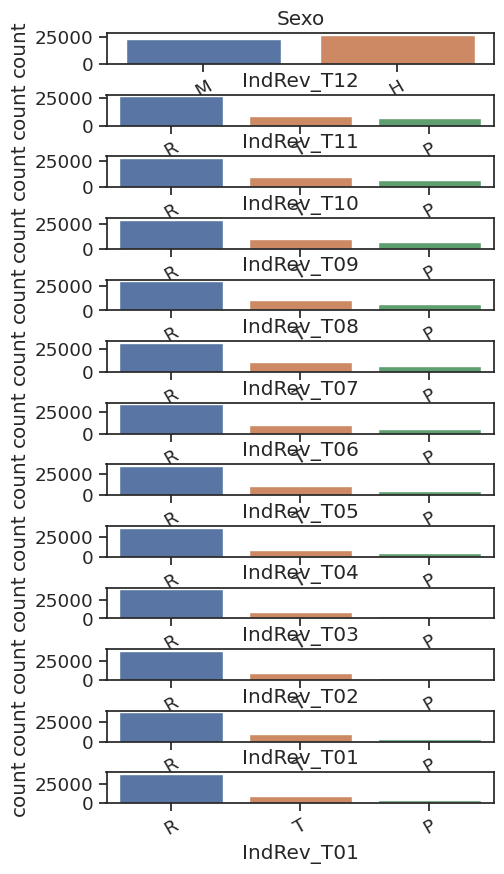

Podemos ver que las clases estan desbalanceadas de las variables IndRev, porque R tiene mas cantidad de datos que T y P. La variable categorica sexo esta balanceada.

In [501]:
# separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal
#col_cat=['Sexo','IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09', 'IndRev_T08', 'IndRev_T07','IndRev_T06', 'IndRev_T05', 'IndRev_T04', 'IndRev_T03', 'IndRev_T02', 'IndRev_T01']

for col in col_cat:
  print(f'Columna {col}: {df1[col].unique()}{df1[col].nunique()} subniveles')

Columna Sexo: ['M' 'H' nan]2 subniveles
Columna IndRev_T12: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T11: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T10: ['R' 'T' nan 'P']3 subniveles
Columna IndRev_T09: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T08: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T07: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T06: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T05: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T04: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T03: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T02: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T01: ['R' 'T' 'P']3 subniveles


Conclusion: No hay errores tipograficos en las clases de las variables categoricas.

## Conjunto de variables
 Se separan el conjuntos las variables del dataset para entenderlas y trabajar con ellas.<br>Al identificar que variables son numericas, se puede realizar analisis de correlacion por ejemplo .

In [502]:
#VARIABLES NUMERICAS
col_num=['Id', 'Subsegmento', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12', 'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12', 'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12', 'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12', 'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12', 'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12', 'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgActAN_T11', 'FlgActAI_T11', 'FlgActPAT_T11', 'FlgActCCPC_T11', 'FlgActCCOT_T11', 'FlgActCOL_T11', 'Fac_T11', 'Txs_T11', 'FacCN_T11', 'TxsCN_T11', 'FacCI_T11', 'TxsCI_T11', 'FacAN_T11', 'TxsAN_T11', 'FacAI_T11', 'TxsAI_T11', 'FacPAT_T11', 'TxsPAT_T11', 'FacCCPC_T11', 'TxsCCPC_T11', 'FacCCOT_T11', 'TxsCCOT_T11', 'FacCOL_T11', 'TxsCOL_T11', 'FacDebCom_T11', 'TxsDebCom_T11', 'FacDebAtm_T11', 'TxsDebAtm_T11', 'Col_T11', 'ColL1T0_T11', 'ColL1TE_T11', 'ColL2T0_T11', 'ColL2AC_T11', 'ColL2CC_T11', 'ColMx_T11', 'PagoNac_T11', 'PagoInt_T11', 'EeccNac_T11', 'EeccInt_T11', 'UsoL1_T11', 'UsoL2_T11', 'UsoLI_T11', 'FlgAct_T10', 'FlgActCN_T10', 'FlgActCI_T10', 'FlgActAN_T10', 'FlgActAI_T10', 'FlgActPAT_T10', 'FlgActCCPC_T10', 'FlgActCCOT_T10', 'FlgActCOL_T10', 'Fac_T10', 'Txs_T10', 'FacCN_T10', 'TxsCN_T10', 'FacCI_T10', 'TxsCI_T10', 'FacAN_T10', 'TxsAN_T10', 'FacAI_T10', 'TxsAI_T10', 'FacPAT_T10', 'TxsPAT_T10', 'FacCCPC_T10', 'TxsCCPC_T10', 'FacCCOT_T10', 'TxsCCOT_T10', 'FacCOL_T10', 'TxsCOL_T10', 'FacDebCom_T10', 'TxsDebCom_T10', 'FacDebAtm_T10', 'TxsDebAtm_T10', 'Col_T10', 'ColL1T0_T10', 'ColL1TE_T10', 'ColL2T0_T10', 'ColL2AC_T10', 'ColL2CC_T10', 'ColMx_T10', 'PagoNac_T10', 'PagoInt_T10', 'EeccNac_T10', 'EeccInt_T10', 'UsoL1_T10', 'UsoL2_T10', 'UsoLI_T10', 'FlgAct_T09', 'FlgActCN_T09', 'FlgActCI_T09', 'FlgActAN_T09', 'FlgActAI_T09', 'FlgActPAT_T09', 'FlgActCCPC_T09', 'FlgActCCOT_T09', 'FlgActCOL_T09', 'Fac_T09', 'Txs_T09', 'FacCN_T09', 'TxsCN_T09', 'FacCI_T09', 'TxsCI_T09', 'FacAN_T09', 'TxsAN_T09', 'FacAI_T09', 'TxsAI_T09', 'FacPAT_T09', 'TxsPAT_T09', 'FacCCPC_T09', 'TxsCCPC_T09', 'FacCCOT_T09', 'TxsCCOT_T09', 'FacCOL_T09', 'TxsCOL_T09', 'FacDebCom_T09', 'TxsDebCom_T09', 'FacDebAtm_T09', 'TxsDebAtm_T09', 'Col_T09', 'ColL1T0_T09', 'ColL1TE_T09', 'ColL2T0_T09', 'ColL2AC_T09', 'ColL2CC_T09', 'ColMx_T09', 'PagoNac_T09', 'PagoInt_T09', 'EeccNac_T09', 'EeccInt_T09', 'UsoL1_T09', 'UsoL2_T09', 'UsoLI_T09', 'FlgAct_T08', 'FlgActCN_T08', 'FlgActCI_T08', 'FlgActAN_T08', 'FlgActAI_T08', 'FlgActPAT_T08', 'FlgActCCPC_T08', 'FlgActCCOT_T08', 'FlgActCOL_T08', 'Fac_T08', 'Txs_T08', 'FacCN_T08', 'TxsCN_T08', 'FacCI_T08', 'TxsCI_T08', 'FacAN_T08', 'TxsAN_T08', 'FacAI_T08', 'TxsAI_T08', 'FacPAT_T08', 'TxsPAT_T08', 'FacCCPC_T08', 'TxsCCPC_T08', 'FacCCOT_T08', 'TxsCCOT_T08', 'FacCOL_T08', 'TxsCOL_T08', 'FacDebCom_T08', 'TxsDebCom_T08', 'FacDebAtm_T08', 'TxsDebAtm_T08', 'Col_T08', 'ColL1T0_T08', 'ColL1TE_T08', 'ColL2T0_T08', 'ColL2AC_T08', 'ColL2CC_T08', 'ColMx_T08', 'PagoNac_T08', 'PagoInt_T08', 'EeccNac_T08', 'EeccInt_T08', 'UsoL1_T08', 'UsoL2_T08', 'UsoLI_T08', 'FlgAct_T07', 'FlgActCN_T07', 'FlgActCI_T07', 'FlgActAN_T07', 'FlgActAI_T07', 'FlgActPAT_T07', 'FlgActCCPC_T07', 'FlgActCCOT_T07', 'FlgActCOL_T07', 'Fac_T07', 'Txs_T07', 'FacCN_T07', 'TxsCN_T07', 'FacCI_T07', 'TxsCI_T07', 'FacAN_T07', 'TxsAN_T07', 'FacAI_T07', 'TxsAI_T07', 'FacPAT_T07', 'TxsPAT_T07', 'FacCCPC_T07', 'TxsCCPC_T07', 'FacCCOT_T07', 'TxsCCOT_T07', 'FacCOL_T07', 'TxsCOL_T07', 'FacDebCom_T07', 'TxsDebCom_T07', 'FacDebAtm_T07', 'TxsDebAtm_T07', 'Col_T07', 'ColL1T0_T07', 'ColL1TE_T07', 'ColL2T0_T07', 'ColL2AC_T07', 'ColL2CC_T07', 'ColMx_T07', 'PagoNac_T07', 'PagoInt_T07', 'EeccNac_T07', 'EeccInt_T07', 'UsoL1_T07', 'UsoL2_T07', 'UsoLI_T07', 'FlgAct_T06', 'FlgActCN_T06', 'FlgActCI_T06', 'FlgActAN_T06', 'FlgActAI_T06', 'FlgActPAT_T06', 'FlgActCCPC_T06', 'FlgActCCOT_T06', 'FlgActCOL_T06', 'Fac_T06', 'Txs_T06', 'FacCN_T06', 'TxsCN_T06', 'FacCI_T06', 'TxsCI_T06', 'FacAN_T06', 'TxsAN_T06', 'FacAI_T06', 'TxsAI_T06', 'FacPAT_T06', 'TxsPAT_T06', 'FacCCPC_T06', 'TxsCCPC_T06', 'FacCCOT_T06', 'TxsCCOT_T06', 'FacCOL_T06', 'TxsCOL_T06', 'FacDebCom_T06', 'TxsDebCom_T06', 'FacDebAtm_T06', 'TxsDebAtm_T06', 'Col_T06', 'ColL1T0_T06', 'ColL1TE_T06', 'ColL2T0_T06', 'ColL2AC_T06', 'ColL2CC_T06', 'ColMx_T06', 'PagoNac_T06', 'PagoInt_T06', 'EeccNac_T06', 'EeccInt_T06', 'UsoL1_T06', 'UsoL2_T06', 'UsoLI_T06', 'FlgAct_T05', 'FlgActCN_T05', 'FlgActCI_T05', 'FlgActAN_T05', 'FlgActAI_T05', 'FlgActPAT_T05', 'FlgActCCPC_T05', 'FlgActCCOT_T05', 'FlgActCOL_T05', 'Fac_T05', 'Txs_T05', 'FacCN_T05', 'TxsCN_T05', 'FacCI_T05', 'TxsCI_T05', 'FacAN_T05', 'TxsAN_T05', 'FacAI_T05', 'TxsAI_T05', 'FacPAT_T05', 'TxsPAT_T05', 'FacCCPC_T05', 'TxsCCPC_T05', 'FacCCOT_T05', 'TxsCCOT_T05', 'FacCOL_T05', 'TxsCOL_T05', 'FacDebCom_T05', 'TxsDebCom_T05', 'FacDebAtm_T05', 'TxsDebAtm_T05', 'Col_T05', 'ColL1T0_T05', 'ColL1TE_T05', 'ColL2T0_T05', 'ColL2AC_T05', 'ColL2CC_T05', 'ColMx_T05', 'PagoNac_T05', 'PagoInt_T05', 'EeccNac_T05', 'EeccInt_T05', 'UsoL1_T05', 'UsoL2_T05', 'UsoLI_T05', 'FlgAct_T04', 'FlgActCN_T04', 'FlgActCI_T04', 'FlgActAN_T04', 'FlgActAI_T04', 'FlgActPAT_T04', 'FlgActCCPC_T04', 'FlgActCCOT_T04', 'FlgActCOL_T04', 'Fac_T04', 'Txs_T04', 'FacCN_T04', 'TxsCN_T04', 'FacCI_T04', 'TxsCI_T04', 'FacAN_T04', 'TxsAN_T04', 'FacAI_T04', 'TxsAI_T04', 'FacPAT_T04', 'TxsPAT_T04', 'FacCCPC_T04', 'TxsCCPC_T04', 'FacCCOT_T04', 'TxsCCOT_T04', 'FacCOL_T04', 'TxsCOL_T04', 'FacDebCom_T04', 'TxsDebCom_T04', 'FacDebAtm_T04', 'TxsDebAtm_T04', 'Col_T04', 'ColL1T0_T04', 'ColL1TE_T04', 'ColL2T0_T04', 'ColL2AC_T04', 'ColL2CC_T04', 'ColMx_T04', 'PagoNac_T04', 'PagoInt_T04', 'EeccNac_T04', 'EeccInt_T04', 'UsoL1_T04', 'UsoL2_T04', 'UsoLI_T04', 'FlgAct_T03', 'FlgActCN_T03', 'FlgActCI_T03', 'FlgActAN_T03', 'FlgActAI_T03', 'FlgActPAT_T03', 'FlgActCCPC_T03', 'FlgActCCOT_T03', 'FlgActCOL_T03', 'Fac_T03', 'Txs_T03', 'FacCN_T03', 'TxsCN_T03', 'FacCI_T03', 'TxsCI_T03', 'FacAN_T03', 'TxsAN_T03', 'FacAI_T03', 'TxsAI_T03', 'FacPAT_T03', 'TxsPAT_T03', 'FacCCPC_T03', 'TxsCCPC_T03', 'FacCCOT_T03', 'TxsCCOT_T03', 'FacCOL_T03', 'TxsCOL_T03', 'FacDebCom_T03', 'TxsDebCom_T03', 'FacDebAtm_T03', 'TxsDebAtm_T03', 'Col_T03', 'ColL1T0_T03', 'ColL1TE_T03', 'ColL2T0_T03', 'ColL2AC_T03', 'ColL2CC_T03', 'ColMx_T03', 'PagoNac_T03', 'PagoInt_T03', 'EeccNac_T03', 'EeccInt_T03', 'UsoL1_T03', 'UsoL2_T03', 'UsoLI_T03', 'FlgAct_T02', 'FlgActCN_T02', 'FlgActCI_T02', 'FlgActAN_T02', 'FlgActAI_T02', 'FlgActPAT_T02', 'FlgActCCPC_T02', 'FlgActCCOT_T02', 'FlgActCOL_T02', 'Fac_T02', 'Txs_T02', 'FacCN_T02', 'TxsCN_T02', 'FacCI_T02', 'TxsCI_T02', 'FacAN_T02', 'TxsAN_T02', 'FacAI_T02', 'TxsAI_T02', 'FacPAT_T02', 'TxsPAT_T02', 'FacCCPC_T02', 'TxsCCPC_T02', 'FacCCOT_T02', 'TxsCCOT_T02', 'FacCOL_T02', 'TxsCOL_T02', 'FacDebCom_T02', 'TxsDebCom_T02', 'FacDebAtm_T02', 'TxsDebAtm_T02', 'Col_T02', 'ColL1T0_T02', 'ColL1TE_T02', 'ColL2T0_T02', 'ColL2AC_T02', 'ColL2CC_T02', 'ColMx_T02', 'PagoNac_T02', 'PagoInt_T02', 'EeccNac_T02', 'EeccInt_T02', 'UsoL1_T02', 'UsoL2_T02', 'UsoLI_T02', 'FlgAct_T01', 'FlgActCN_T01', 'FlgActCI_T01', 'FlgActAN_T01', 'FlgActAI_T01', 'FlgActPAT_T01', 'FlgActCCPC_T01', 'FlgActCCOT_T01', 'FlgActCOL_T01', 'Fac_T01', 'Txs_T01', 'FacCN_T01', 'TxsCN_T01', 'FacCI_T01', 'TxsCI_T01', 'FacAN_T01', 'TxsAN_T01', 'FacAI_T01', 'TxsAI_T01', 'FacPAT_T01', 'TxsPAT_T01', 'FacCCPC_T01', 'TxsCCPC_T01', 'FacCCOT_T01', 'TxsCCOT_T01', 'FacCOL_T01', 'TxsCOL_T01', 'FacDebCom_T01', 'TxsDebCom_T01', 'FacDebAtm_T01', 'TxsDebAtm_T01', 'Col_T01', 'ColL1T0_T01', 'ColL1TE_T01', 'ColL2T0_T01', 'ColL2AC_T01', 'ColL2CC_T01', 'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'target']


Estas variables type float son importantes para el modelo de regresion lineal , es por ello que se tienen que identificar para utilizarlas .

In [503]:
# Se selecciona solo columnas de tipo float64
df1_float = df1.select_dtypes(include='float64')  # Esto selecciona solo columnas de tipo float64

var_float_lista = list(df1_float)
print(var_float_lista)



['Id', 'Subsegmento', 'Region', 'Renta', 'CambioPin', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12', 'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12', 'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12', 'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12', 'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12', 'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12', 'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgActAN_T11', 'FlgActAI_T11', 'FlgActPAT_T11', 'FlgActCCPC_T11', 'FlgActCCOT_T11', 'FlgActCOL_T11', 'Fac_T11', 'Txs_T11', 'FacCN_T11', 'TxsCN_T11', 'FacCI_T11', 'TxsCI_T11', 'FacAN_T11', 'TxsAN_T11', 'FacAI_T11', 'TxsAI_

##Estadistica Descriptiva

Analizamos los datos  para ver el tipo de distribucion de cada variable y las medidas de dispersion

In [504]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,51124.0,25562.500000,14758.371918,1.00,12781.75,25562.5,38343.25,51124.00
Subsegmento,51124.0,181.655230,25.527475,151.00,160.00,170.0,210.00,220.00
Region,51071.0,10.828220,3.392703,1.00,9.00,13.0,13.00,13.00
Edad,51124.0,38.702879,13.302573,9.00,28.00,35.0,46.00,104.00
Renta,37759.0,663077.078726,409279.460268,1.00,419999.00,567012.0,814903.50,13089327.00
...,...,...,...,...,...,...,...,...
EeccInt_T01,51124.0,7.323155,108.161194,-7886.76,0.00,0.0,0.00,3929.81
UsoL1_T01,51124.0,184092.343547,289173.134339,-3763996.60,17707.50,81129.0,227814.50,6911556.00
UsoL2_T01,51124.0,136032.715750,432538.882162,-4.00,0.00,29646.5,102102.25,11785487.00
UsoLI_T01,51124.0,8.294372,113.215624,-7785.12,0.00,0.0,0.00,3929.81


In [505]:
df1['Renta'].describe()

count    3.775900e+04
mean     6.630771e+05
std      4.092795e+05
min      1.000000e+00
25%      4.199990e+05
50%      5.670120e+05
75%      8.149035e+05
max      1.308933e+07
Name: Renta, dtype: float64

 Desviaciones Estándar:<br>
  Las variables con desviaciones estándar más altas pueden tener una mayor variabilidad en sus valores, mientras que las desviaciones estándar más bajas indican menos variabilidad.Indica cuánto se desvían típicamente los valores individuales de la media. Una desviación estándar más alta indica mayor variabilidad. proporciona información sobre la consistencia o la dispersión de los datos.

###Observaciones de algunas variables :

En esta tabla de puede ver que los datos no estan escalados y normalizados.<br>
Tambien al observar medidas de tendencia central(moda/mediana/media) notamos que las variable en tienen un sesgo hacia la derecha. Se puede deducir que la mayoria de la variables no tienen una distribucion normal.

1) 'Renta':La mitad de las observaciones en ese conjunto de datos tienen  rentas menores o iguales a 567012 , y la otra mitad tiene rentas mayores o iguales a 567012.<br>
El percentil 25 (primer cuartil) es 419999. Esto significa que el 25% de los clientes tienen un sueldo igual o inferior a esta cantidad.<br>
El percentil 50 (la mediana) es 567012. Esto significa que el 50% de los clientes tienen un sueldo igual o inferior a esta cantidad.<br>
El percentil 75 (el tercer cuartil) es 814903. Esto significa que el 75% de los clientes tienen un sueldo igual o inferior a esta cantidad<br>.
El valor  max  significa que el 99% de los clientes tienen un sueldo igual o inferior a esta cantidad.<br>


2) "PagoNac_T12" se ven altamente dispersos, con una media y una mediana muy diferentes . La presencia de valores atípicos puede estar afectando la media y la desviación estándar. La moda indica que 0 es el valor más común<br>
-Media : El valor medio o promedio de la variable es de aproximadamente 72569.60.<br>

-Mediana: La mediana de la variable es de 26275.0. Esto indica que la mitad de los valores de "PagoNac_T12" son iguales o menores a 26,275.0 y la otra mitad son iguales o mayores a 26,275.0. La mediana es menos sensible a los valores atípicos en comparación con la media.<br>
-Desviación Estándar: La desviación estándar es alta, con un valor de aproximadamente 184776.19. Esto indica que los valores de "PagoNac_T12" están bastante dispersos alrededor de la media. Una desviación estándar alta sugiere una variabilidad significativa en los datos.<br>
-Varianza: La varianza es una medida de la dispersión de los datos, y su valor es de aproximadamente 34142241284. Es el cuadrado de la desviación estándar y refleja la variabilidad en los valores de "PagoNac_T12".<br>
Una varianza alta también indica una gran variabilidad en los datos.<br>
-Rango: El rango es la diferencia entre el valor máximo y el valor mínimo en la variable.Es de 13873295, lo que significa que la diferencia entre el valor máximo y el valor mínimo de "PagoNac_T12" es bastante grande<br>
3) Edad=La mitad de las personas en ese conjunto de datos tienen edades menores o iguales a 35 años, y la otra mitad tiene edades mayores o iguales a 35 años.<br>

#### HISTOGRAMA <BR>
Se visualiza la distribución de algunas columna, para elegir el método de normalización de las variables .<br>


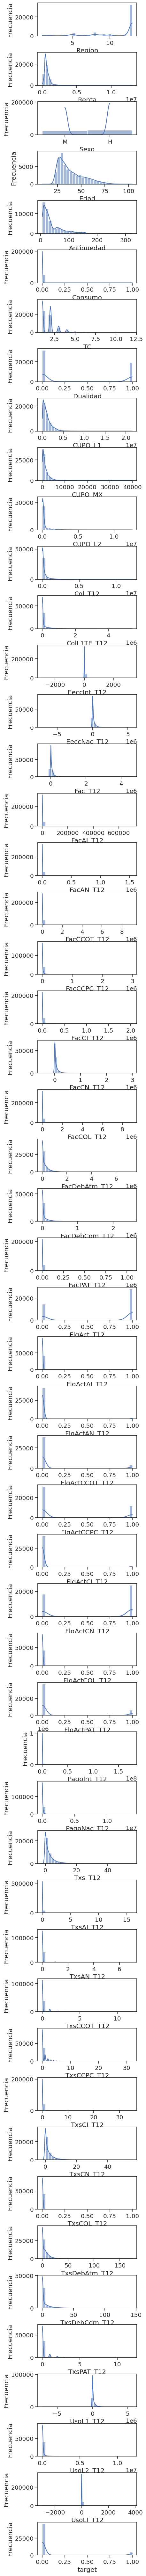

In [506]:
# columnas : es una lista de columnas del DataFrame df, para ejemplicar las distribuciones de las variables
columnas=['Region','Renta','Sexo','Edad','Antiguedad','Consumo',
                      'TC','Dualidad',
                           'CUPO_L1','CUPO_MX','CUPO_L2','Col_T12','ColL1TE_T12','EeccInt_T12','EeccNac_T12',
                           'Fac_T12','FacAI_T12','FacAN_T12','FacCCOT_T12','FacCCPC_T12','FacCI_T12','FacCN_T12',
                           'FacCOL_T12','FacDebAtm_T12','FacDebCom_T12','FacPAT_T12','FlgAct_T12','FlgActAI_T12',
                           'FlgActAN_T12','FlgActCCOT_T12','FlgActCCPC_T12','FlgActCI_T12','FlgActCN_T12',
                           'FlgActCOL_T12','FlgActPAT_T12','PagoInt_T12','PagoNac_T12','Txs_T12','TxsAI_T12',
                           'TxsAN_T12','TxsCCOT_T12','TxsCCPC_T12','TxsCI_T12','TxsCN_T12','TxsCOL_T12',
                           'TxsDebAtm_T12','TxsDebCom_T12','TxsPAT_T12','UsoL1_T12','UsoL2_T12','UsoLI_T12','target']
fig, axes = plt.subplots(nrows=len(columnas), ncols=1, figsize=(4, 2 * len(columnas)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas):
    sns.histplot(df1[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.show()

Se puede visualizar que las MAYORIA de estas variables estan sesgadas hacia la derecha.<br>


Visualizamos las distribucion de las variables. Ninguna de estas variables tiene una distribucion normal. <br>
Se realizara la transformacion logarítmica para el modelo de Regresion, ya que los datos tienden asimetría positiva, es decir, cuando la cola derecha de la distribución es más larga que la cola izquierda.Tambien puede ayudar a estabilizar la varianza.

Observaciones Histograma:<br> La mayor parte de los clientes tiene edades entre los 28 y los 38 años, con sesgo hacia los 20-35años.<br>

Los mayoria de los clientes tienen Renta baja.Los datos están sesgados hacia la izquierda o tiene un sesgo negativo(La media es menor que la mediana.).Se debe utilizar la mediana en lugar de la media, ya que la media puede verse afectada por los valores extremadamente bajos.
Se identifican valores atípicos o extremadamente altos, estos representan una mayor carga de datos en la distribución de sueldos<br>

En la variable antiguedad ,la mayor cantidad de clientes son nuevos.<br>
'Renta':Se identifican valores atípicos o extremadamente altos,y representa una mayor carga de datos en la distribución de sueldos.<br>

Las mayoria de las variables en estos graficos estan sesgadas a la derecha




## Outliers



Mediante grafico de cajas , poedmos visualizar que tienen gran cantidad de outliers la variable Renta , Cupol1 y CuPO_L2 . Estos hay que identificarlos, imputarlos o borrarlos, para que no sean problema cuando se escalen los datos y se implemente el modelo.

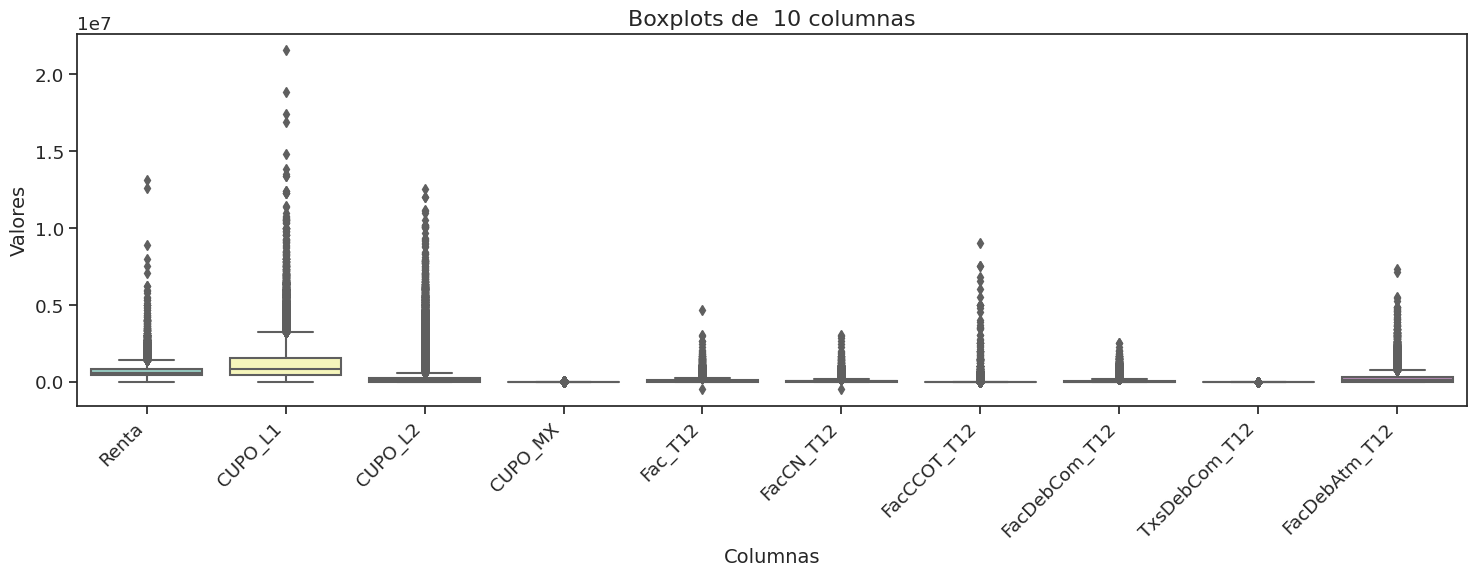

In [507]:
columnas_a_mostrar=[ 'Renta', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'Fac_T12','FacCN_T12','FacCCOT_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12']
# Ajustar el tamaño del gráfico
plt.figure(figsize=(15, 6))
# Crear un boxplot para las primeras 10 columnas
sns.boxplot(data=df1[columnas_a_mostrar],  palette="Set3")

plt.xlabel("Columnas", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.title("Boxplots de  10 columnas", fontsize=16)
# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


##Correlacion

La correlación no implica causalidad. Dos variables pueden estar correlacionadas, pero no necesariamente una causa a la otra.Es por ello que es importante comprender el negocio.<br>
La correlacion nos ayuda a determinar nuestras variables predictivas, en relacion con el target.

In [508]:
df_corr=df1.corr()

In [509]:
df_corr.head(10)

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Fac_T11,Txs_T11,FacCN_T11,TxsCN_T11,FacCI_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,FacAI_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,Col_T11,ColL1T0_T11,ColL1TE_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,ColMx_T11,PagoNac_T11,PagoInt_T11,EeccNac_T11,EeccInt_T11,UsoL1_T11,UsoL2_T11,UsoLI_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Fac_T10,Txs_T10,FacCN_T10,TxsCN_T10,FacCI_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,FacAI_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,Col_T10,ColL1T0_T10,ColL1TE_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,ColMx_T10,PagoNac_T10,PagoInt_T10,EeccNac_T10,EeccInt_T10,UsoL1_T10,UsoL2_T10,UsoLI_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,Col_T09,ColL1T0_T09,ColL1TE_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,ColMx_T09,PagoNac_T09,PagoInt_T09,EeccNac_T09,EeccInt_T09,UsoL1_T09,UsoL2_T09,UsoLI_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,Col_T08,ColL1T0_T08,ColL1TE_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,ColMx_T08,PagoNac_T08,PagoInt_T08,EeccNac_T08,EeccInt_T08,UsoL1_T08,UsoL2_T08,UsoLI_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,TxsCCPC_T07,FacCCOT_T07,TxsCCOT_T07,FacCOL_T07,TxsCOL_T07,FacDebCom_T07,...,UsoL2_T07,UsoLI_T07,FlgAct_T06,FlgActCN_T06,FlgActCI_T06,FlgActAN_T06,FlgActAI_T06,FlgActPAT_T06,FlgActCCPC_T06,FlgActCCOT_T06,FlgActCOL_T06,Fac_T06,Txs_T06,FacCN_T06,TxsCN_T06,FacCI_T06,TxsCI_T06,FacAN_T06,TxsAN_T06,FacAI_T06,TxsAI_T06,FacPAT_T06,TxsPAT_T06,FacCCPC_T06,TxsCCPC_T06,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,Col_T06,ColL1T0_T06,ColL1TE_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,ColMx_T06,PagoNac_T06,PagoInt_T06,EeccNac_T06,EeccInt_T06,UsoL1_T06,UsoL2_T06,UsoLI_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T05,FlgActCOL_T05,Fac_T05,Txs_T05,FacCN_T05,TxsCN_T05,FacCI_T05,TxsCI_T05,FacAN_T05,TxsAN_T05,FacAI_T05,TxsAI_T05,FacPAT_T05,TxsPAT_T05,FacCCPC_T05,TxsCCPC_T05,FacCCOT_T05,TxsCCOT_T05,FacCOL_T05,TxsCOL_T05,FacDebCom_T05,TxsDebCom_T05,FacDebAtm_T05,TxsDebAtm

Podemos ver que la correlacion entre variables aun no es tan alta, hay que transformar los datos para volver a analizar este item, y buscar las mejores variables predictivas.

#### Mapa de calor <br>
Se visualizan 20 variables en el mapa de calor donde se pueden identificar las variables que tienen mayor correlacion cercana a 1 o cercana a -1.

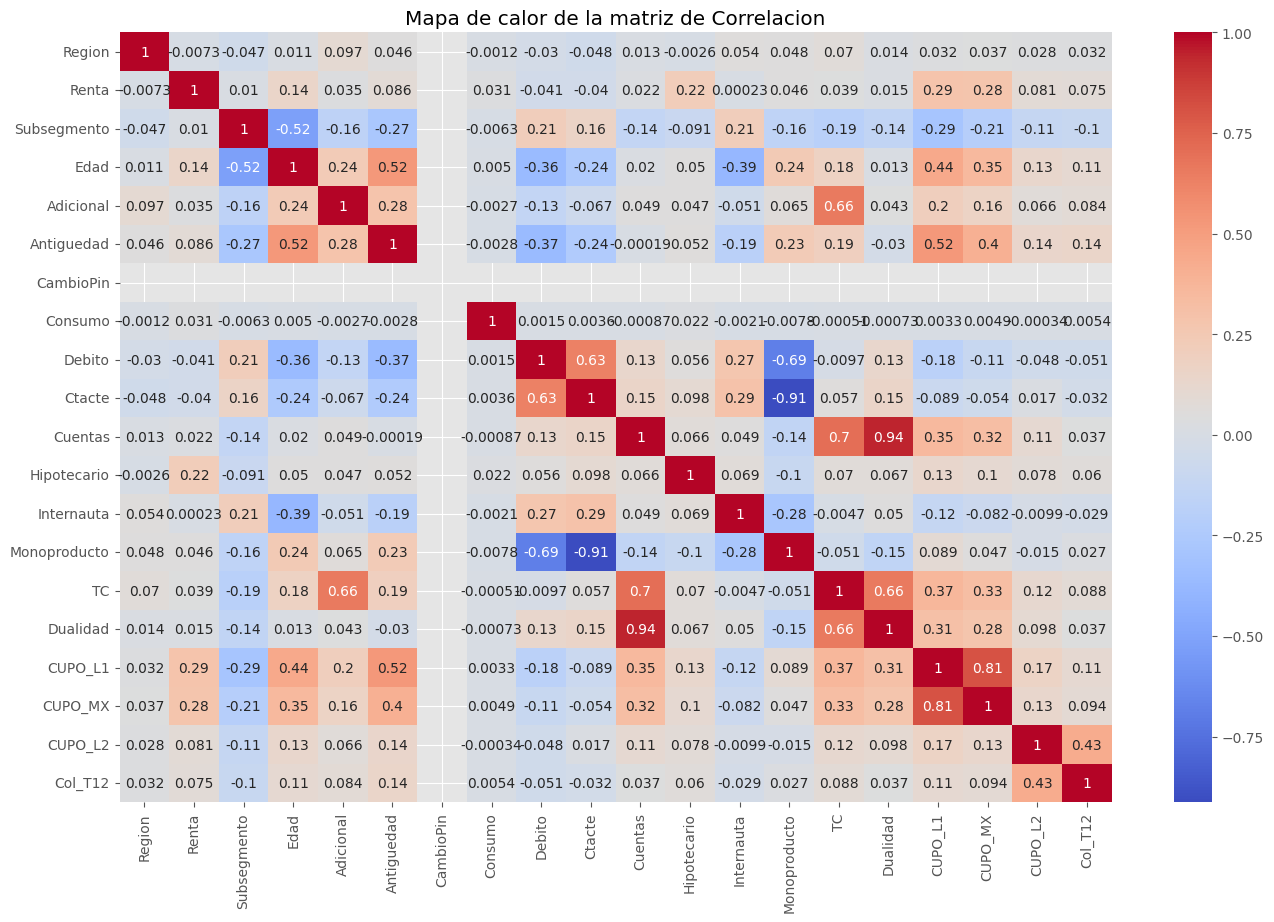

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(df_corr.iloc[:20,:20], annot=True, cmap='coolwarm')
plt.title("Mapa de calor de la matriz de Correlacion")
plt.show()

###Correlacion de 'Renta'que es nuestro Target de regresion lineal
 Nos muestra cuales son las caracteristicas son con la que tiene una mejor relacion.Las correlaciones entregadas estan lejos de ser optimas, esto ocurre por que no se han hecho transformaciones a la base de datos.

In [510]:
df_clasificacion=corr = df1.corr()
top_corr = corr['Renta'].sort_values(ascending=False)[1:16]
print(top_corr)

CUPO_L1          0.289283
CUPO_MX          0.275007
Hipotecario      0.222307
Edad             0.143001
FacDebCom_T12    0.122906
FacDebCom_T08    0.113926
FacDebCom_T11    0.112852
FacDebCom_T09    0.112599
FacDebCom_T10    0.111839
EeccNac_T07      0.111309
EeccNac_T11      0.109154
FacDebCom_T01    0.107506
Fac_T02          0.107440
EeccNac_T12      0.107225
FacDebCom_T03    0.107174
Name: Renta, dtype: float64


# FASE3 Preparacion de los datos

* Limpiar y preprocesar los datos.
* Manejar valores faltantes y outliers.
* Transformar variables según sea necesario.
* Seleccionar las características más relevantes.
* La normalización o escalado de datos se lleva a cabo en esta fase. Aquí es donde se aplican técnicas como la normalización min-max, la estandarización (z-score), u otras formas de escalado para asegurar que todas las características tengan una escala comparable.
* Dividir los datos en conjuntos de entrenamiento y prueba.


###Limpiar y preprocesar los datos.<br>


In [483]:
df5=df1

2. ## Escalado* de Variables Numéricas

SE escalan las variables numéricas para que tengan una escala similar. Esto ayuda a que el modelo de regresión no se vea afectado por las diferencias en las magnitudes de las variables

In [484]:
df1.head()

,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,IndRev_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Fac_T11,Txs_T11,FacCN_T11,TxsCN_T11,FacCI_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,FacAI_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,Col_T11,ColL1T0_T11,ColL1TE_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,ColMx_T11,PagoNac_T11,PagoInt_T11,EeccNac_T11,EeccInt_T11,UsoL1_T11,UsoL2_T11,UsoLI_T11,IndRev_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Fac_T10,Txs_T10,FacCN_T10,TxsCN_T10,FacCI_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,FacAI_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,Col_T10,ColL1T0_T10,ColL1TE_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,ColMx_T10,PagoNac_T10,PagoInt_T10,EeccNac_T10,EeccInt_T10,UsoL1_T10,UsoL2_T10,UsoLI_T10,IndRev_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,Col_T09,ColL1T0_T09,ColL1TE_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,ColMx_T09,PagoNac_T09,PagoInt_T09,EeccNac_T09,EeccInt_T09,UsoL1_T09,UsoL2_T09,UsoLI_T09,IndRev_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,Col_T08,ColL1T0_T08,ColL1TE_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,ColMx_T08,PagoNac_T08,PagoInt_T08,EeccNac_T08,EeccInt_T08,UsoL1_T08,UsoL2_T08,UsoLI_T08,IndRev_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,TxsCCPC_T07,FacCCOT_T07,TxsCCOT_T07,...,FlgActAI_T06,FlgActPAT_T06,FlgActCCPC_T06,FlgActCCOT_T06,FlgActCOL_T06,Fac_T06,Txs_T06,FacCN_T06,TxsCN_T06,FacCI_T06,TxsCI_T06,FacAN_T06,TxsAN_T06,FacAI_T06,TxsAI_T06,FacPAT_T06,TxsPAT_T06,FacCCPC_T06,TxsCCPC_T06,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,Col_T06,ColL1T0_T06,ColL1TE_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,ColMx_T06,PagoNac_T06,PagoInt_T06,EeccNac_T06,EeccInt_T06,UsoL1_T06,UsoL2_T06,UsoLI_T06,IndRev_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T05,FlgActCOL_T05,Fac_T05,Txs_T05,FacCN_T05,TxsCN_T05,FacCI_T05,TxsCI_T05,FacAN_T05,TxsAN_T05,FacAI_T05,TxsAI_T05,FacPAT_T05,TxsPAT_T05,FacCCPC_T05,TxsCCPC_T05,FacCCOT_T05,TxsCCOT_T05,FacCOL_T05,TxsCOL_T05,FacDebCom_T05,TxsDebCom_T05,FacDebAtm_T05,TxsDebAtm_T05,Col_T05,ColL1T0_T05,ColL1TE_T05,ColL2T0_T05,ColL2AC_T05

In [485]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Separar las columnas en flotantes y enteras
float_columns = df1.select_dtypes(include='float').columns
int_columns = df1.select_dtypes(include='int').columns

# Aplicar Min-Max Scaling a las características flotantes
scaler_float = MinMaxScaler()
df1[float_columns] = scaler_float.fit_transform(df1[float_columns])

# Aplicar estandarización a las características enteras
scaler_int = StandardScaler()
df1[int_columns] = scaler_int.fit_transform(df1[int_columns])

In [486]:
df1.head()

,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,IndRev_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Fac_T11,Txs_T11,FacCN_T11,TxsCN_T11,FacCI_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,FacAI_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,Col_T11,ColL1T0_T11,ColL1TE_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,ColMx_T11,PagoNac_T11,PagoInt_T11,EeccNac_T11,EeccInt_T11,UsoL1_T11,UsoL2_T11,UsoLI_T11,IndRev_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Fac_T10,Txs_T10,FacCN_T10,TxsCN_T10,FacCI_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,FacAI_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,Col_T10,ColL1T0_T10,ColL1TE_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,ColMx_T10,PagoNac_T10,PagoInt_T10,EeccNac_T10,EeccInt_T10,UsoL1_T10,UsoL2_T10,UsoLI_T10,IndRev_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,Col_T09,ColL1T0_T09,ColL1TE_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,ColMx_T09,PagoNac_T09,PagoInt_T09,EeccNac_T09,EeccInt_T09,UsoL1_T09,UsoL2_T09,UsoLI_T09,IndRev_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,Col_T08,ColL1T0_T08,ColL1TE_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,ColMx_T08,PagoNac_T08,PagoInt_T08,EeccNac_T08,EeccInt_T08,UsoL1_T08,UsoL2_T08,UsoLI_T08,IndRev_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,TxsCCPC_T07,FacCCOT_T07,TxsCCOT_T07,...,FlgActAI_T06,FlgActPAT_T06,FlgActCCPC_T06,FlgActCCOT_T06,FlgActCOL_T06,Fac_T06,Txs_T06,FacCN_T06,TxsCN_T06,FacCI_T06,TxsCI_T06,FacAN_T06,TxsAN_T06,FacAI_T06,TxsAI_T06,FacPAT_T06,TxsPAT_T06,FacCCPC_T06,TxsCCPC_T06,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,Col_T06,ColL1T0_T06,ColL1TE_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,ColMx_T06,PagoNac_T06,PagoInt_T06,EeccNac_T06,EeccInt_T06,UsoL1_T06,UsoL2_T06,UsoLI_T06,IndRev_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T05,FlgActCOL_T05,Fac_T05,Txs_T05,FacCN_T05,TxsCN_T05,FacCI_T05,TxsCI_T05,FacAN_T05,TxsAN_T05,FacAI_T05,TxsAI_T05,FacPAT_T05,TxsPAT_T05,FacCCPC_T05,TxsCCPC_T05,FacCCOT_T05,TxsCCOT_T05,FacCOL_T05,TxsCOL_T05,FacDebCom_T05,TxsDebCom_T05,FacDebAtm_T05,TxsDebAtm_T05,Col_T05,ColL1T0_T05,ColL1TE_T05,ColL2T0_T05,ColL2AC_T05

1. Manejo de Variables Categóricas

In [488]:
# Supongamos que 'df' es tu DataFrame y 'categorical_columns' es la lista de columnas categóricas
df1= pd.get_dummies(df1, columns=col_cat, drop_first=True)


In [489]:
df1.head()

,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Fac_T11,Txs_T11,FacCN_T11,TxsCN_T11,FacCI_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,FacAI_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,Col_T11,ColL1T0_T11,ColL1TE_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,ColMx_T11,PagoNac_T11,PagoInt_T11,EeccNac_T11,EeccInt_T11,UsoL1_T11,UsoL2_T11,UsoLI_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Fac_T10,Txs_T10,FacCN_T10,TxsCN_T10,FacCI_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,FacAI_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,Col_T10,ColL1T0_T10,ColL1TE_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,ColMx_T10,PagoNac_T10,PagoInt_T10,EeccNac_T10,EeccInt_T10,UsoL1_T10,UsoL2_T10,UsoLI_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,Col_T09,ColL1T0_T09,ColL1TE_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,ColMx_T09,PagoNac_T09,PagoInt_T09,EeccNac_T09,EeccInt_T09,UsoL1_T09,UsoL2_T09,UsoLI_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,Col_T08,ColL1T0_T08,ColL1TE_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,ColMx_T08,PagoNac_T08,PagoInt_T08,EeccNac_T08,EeccInt_T08,UsoL1_T08,UsoL2_T08,UsoLI_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,TxsCCPC_T07,FacCCOT_T07,TxsCCOT_T07,FacCOL_T07,TxsCOL_T07,FacDebCom_T07,TxsDebCom_T07,FacDebAtm_T07,TxsDebAtm_T07,...,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,Col_T06,ColL1T0_T06,ColL1TE_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,ColMx_T06,PagoNac_T06,PagoInt_T06,EeccNac_T06,EeccInt_T06,UsoL1_T06,UsoL2_T06,UsoLI_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T05,FlgActCOL_T05,Fac_T05,Txs_T05,FacCN_T05,TxsCN_T05,FacCI_T05,TxsCI_T05,FacAN_T05,TxsAN_T05,FacAI_T05,TxsAI_T05,FacPAT_T05,TxsPAT_T05,FacCCPC_T05,TxsCCPC_T05,FacCCOT_T05,TxsCCOT_T05,FacCOL_T05,TxsCOL_T05,FacDebCom_T05,TxsDebCom_T05,FacDebAtm_T05,TxsDebAtm_T05,Col_T05,ColL1T0_T05,ColL1TE_T05,ColL2T0_T05,ColL2AC_T05,ColL2CC_T05,ColMx_T05,PagoNac_T05,PagoInt_T05,EeccNac_T05,EeccInt_T05,UsoL1_T05,UsoL2_T05,UsoLI_T05,FlgAct_T04,FlgActCN_T04,FlgActCI_T04,FlgActAN_T04,FlgActAI_T04,FlgActPAT_T04,FlgActCCPC_T04,FlgActCCOT_T0

 ## Manejo de Valores Faltantes:
Si tienes valores faltantes, debes decidir si eliminar esas filas, imputar los valores faltantes o usar técnicas más avanzadas de manejo de valores faltantes.

---



In [490]:
df1.isnull().sum()

Region             53
Edad                0
Renta           13365
Antiguedad          0
Internauta          0
                ...  
IndRev_T03_T        0
IndRev_T02_R        0
IndRev_T02_T        0
IndRev_T01_R        0
IndRev_T01_T        0
Length: 583, dtype: int64

In [445]:
from sklearn.impute import SimpleImputer
# Seleccionar automáticamente las columnas numéricas
numeric_columns = df1.select_dtypes(include='number').columns

# Crear un imputador con estrategia de 'mean'
imputer = SimpleImputer(strategy='mean')

# Imputar valores faltantes para todas las columnas numéricas
dfx[numeric_columns] = imputer.fit_transform(dfx[numeric_columns])


In [446]:
dfx.shape

(51124, 583)

 ## Selección de Características:
Puedes utilizar técnicas de selección de características para elegir las variables más relevantes para tu modelo. Esto puede ayudar a mejorar la interpretabilidad y el rendimiento del modelo.

In [450]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
import pandas as pd

# Supongamos que 'dfx' es tu DataFrame original
# dfx = ...

# Separar las características (X) y la variable objetivo (y)
X = dfx.drop('Renta', axis=1)
y = dfx['Renta']

# Crear modelo de regresión lineal para la selección de características
model = LinearRegression()

# Utilizar SelectFromModel para seleccionar características
sfm = SelectFromModel(model)
X_selected = sfm.fit_transform(X, y)

# Obtener las columnas seleccionadas
selected_columns = X.columns[sfm.get_support()]

# Crear un nuevo DataFrame con solo las características seleccionadas y la variable objetivo
dfx_selected = dfx[selected_columns.union(['Renta'])]

# dfx_selected ahora contiene solo las características seleccionadas y la variable objetivo


In [451]:
dfx_selected.shape

(51124, 93)

In [452]:
dfx_selected.head()

,ColL1T0_T02,ColL1T0_T05,ColL1TE_T01,ColL1TE_T02,ColL1TE_T05,ColL1TE_T09,ColL1TE_T10,ColL2AC_T02,ColL2AC_T03,ColL2AC_T05,ColL2AC_T06,ColL2AC_T07,ColL2AC_T09,ColL2AC_T10,ColL2AC_T11,ColL2CC_T02,ColL2CC_T05,ColL2CC_T10,ColL2CC_T11,ColL2T0_T02,ColL2T0_T05,ColMx_T05,Col_T01,Col_T02,Col_T03,Col_T05,Col_T06,Col_T07,Col_T09,Col_T10,Col_T11,FacAI_T01,FacAN_T01,FacAN_T11,FacAN_T12,FacCI_T01,FacCI_T02,FacCI_T04,FacCI_T08,FacCI_T11,FacCI_T12,FacCN_T01,FacCN_T02,FacCN_T04,FacCN_T08,FacCN_T10,FacCN_T11,FacCN_T12,FacPAT_T01,FacPAT_T12,Fac_T01,Fac_T02,Fac_T04,Fac_T08,Fac_T10,Fac_T11,Fac_T12,FlgActCOL_T12,Renta,TxsAI_T01,TxsAI_T05,TxsAN_T01,TxsAN_T05,TxsCI_T01,TxsCI_T04,TxsCI_T05,TxsCI_T06,TxsCI_T07,TxsCI_T08,TxsCI_T10,TxsCI_T11,TxsCN_T01,TxsCN_T04,TxsCN_T05,TxsCN_T06,TxsCN_T07,TxsCN_T08,TxsCN_T10,TxsCN_T11,TxsCN_T12,TxsCOL_T12,TxsPAT_T01,TxsPAT_T05,TxsPAT_T11,Txs_T01,Txs_T04,Txs_T05,Txs_T06,Txs_T07,Txs_T08,Txs_T10,Txs_T11,Txs_T12
0,0.000000,0.000000,0.163875,0.184016,0.173171,0.150715,0.153219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013771,0.026753,0.000000,0.0,0.000000,0.020124,0.000000,0.090767,0.089046,0.087153,0.083116,0.093896,0.083590,0.066871,0.062893,0.060188,-0.032534,-0.099335,0.0,0.0,-0.09667,0.019427,0.0,0.0,0.0,0.0,-0.503637,0.054151,0.052371,0.163774,0.065983,0.505350,0.153876,-0.193076,0.0,-0.527489,0.053991,0.052371,0.113190,0.052423,0.374735,0.104757,0.0,0.050658,-0.037477,0.0,-0.139345,0.0,-0.125455,0.0,0.0,0.000000,0.029412,0.0,0.000000,0.0,-0.613772,0.019608,0.016949,0.117647,0.127273,0.12,0.083333,0.035088,0.086207,0.0,-0.315269,0.0,0.0,-0.684955,0.009709,0.016949,0.117647,0.127273,0.098361,0.063830,0.035088,0.086207
1,0.000000,0.000000,0.025666,0.079628,0.068782,0.088886,0.034829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.006279,0.001981,0.0,0.002382,0.023246,0.063003,0.017978,0.037348,0.036137,0.045879,0.066147,0.051439,0.053753,0.055385,0.042163,-0.032534,-0.099335,0.0,0.0,-0.09667,0.019427,0.0,0.0,0.0,0.0,0.502227,0.056442,0.052371,0.223418,0.094291,0.566312,0.143624,-0.193076,0.0,0.351310,0.056276,0.052371,0.154412,0.130480,0.419940,0.097777,0.0,0.010974,-0.037477,0.0,-0.139345,0.0,-0.125455,0.0,0.0,0.132075,0.029412,0.0,0.176471,0.0,-0.329804,0.019608,0.033898,0.044118,0.072727,0.12,0.145833,0.175439,0.051724,0.0,-0.315269,0.0,0.0,-0.415219,0.009709,0.033898,0.147059,0.072727,0.098361,0.255319,0.175439,0.051724
2,0.012506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000628,0.004044,0.003724,0.000000,0.011471,0.016693,0.005285,0.001792,0.008111,-0.032534,-0.099335,0.0,0.0,-0.09667,0.019427,0.0,0.0,0.0,0.0,1.123957,0.063437,0.082452,0.382230,0.063315,0.525719,0.173549,-0.193076,0.0,0.894500,0.063251,0.082452,0.264173,0.050103,0.389839,0.118150,0.0,0.070982,-0.037477,0.0,-0.139345,0.0,-0.125455,0.0,0.0,0.000000,0.147059,0.0,0.000000,0.0,0.238133,0.156863,0.067797,0.102941,0.200000,0.22,0.062500,0.105263,0.086207,0.0,-0.315269,0.0,0.0,0.124252,0.077670,0.067797,0.102941,0.272727,0.180328,0.042553,0.105263,0.086207
3,0.000000,0.007317,0.038443,0.049697,0.057411,0.064686,0.065775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001024,0.003340,0.000000,0.0,0.011584,0.010760,0.000000,0.022244,0.025273,0.027732,0.028009,0.032476,0.031245,0.031333,0.031365,0.028509,-0.032534,-0.099335,0.0,0.0,-0.09667,0.019427,0.0,0.0,0.0,0.0,-0.402495,0.055431,0.060110,0.154883,0.068729,0.520483,0.150710,-0.193076,0.0,-0.439124,0.055268,0.060110,0.107045,0.054813,0.385956,0.102601,0.0,0.013175,-0.037477,0.0,-0.139345,0.0,-0.125455,0.0,0.0,0.000000,0.029412,0.0,0.000000,0.0,-0.329804,0.058824,0.050847,0.132353,0.018182,0.08,0.062500,0.105263,0.086207,0.0,-0.315269,0.0,0.0,-0.415219,0.029126,0.050847,0.132353,0.018182,0.065574,0.042553,0.105263,0.086207
4,0.015207,0.026259,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013459,0.000000,0.000000,0.0,0.091700,0.070840,0.000000,0.025978,0.023855,0.015349,0.016780,0.021423,0.024268,0.02

In [469]:

columnas_seleccionadas = ['Region','Renta','Subsegmento','Edad','Adicional','Antiguedad','CambioPin','Consumo',
                           'Debito','Ctacte','Cuentas','Hipotecario','Internauta','Monoproducto','TC','Dualidad',
                           'CUPO_L1','CUPO_MX','CUPO_L2','Col_T12','ColL1TE_T12','EeccInt_T12','EeccNac_T12',
                           'Fac_T12','FacAI_T12','FacAN_T12','FacCCOT_T12','FacCCPC_T12','FacCI_T12','FacCN_T12',
                           'FacCOL_T12','FacDebAtm_T12','FacDebCom_T12','FacPAT_T12','FlgAct_T12','FlgActAI_T12',
                           'FlgActAN_T12','FlgActCCOT_T12','FlgActCCPC_T12','FlgActCI_T12','FlgActCN_T12',
                           'FlgActCOL_T12','FlgActPAT_T12','PagoInt_T12','PagoNac_T12','Txs_T12','TxsAI_T12',
                           'TxsAN_T12','TxsCCOT_T12','TxsCCPC_T12','TxsCI_T12','TxsCN_T12','TxsCOL_T12',
                           'TxsDebAtm_T12','TxsDebCom_T12','TxsPAT_T12','UsoL1_T12','UsoL2_T12','UsoLI_T12','target']


In [470]:
# Supongamos que 'df' es tu DataFrame original y 'columnas_seleccionadas' es la lista de columnas seleccionadas

# Crear un nuevo DataFrame con las columnas seleccionadas
dfH = df[columnas_seleccionadas].copy()

# df_seleccionado ahora contiene solo las columnas seleccionadas


In [474]:
dfH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          51071 non-null  float64
 1   Renta           37759 non-null  float64
 2   Subsegmento     51124 non-null  float64
 3   Edad            51124 non-null  int64  
 4   Adicional       51124 non-null  int64  
 5   Antiguedad      51124 non-null  int64  
 6   CambioPin       31736 non-null  float64
 7   Consumo         51124 non-null  int64  
 8   Debito          51124 non-null  int64  
 9   Ctacte          51124 non-null  int64  
 10  Cuentas         51124 non-null  int64  
 11  Hipotecario     51124 non-null  int64  
 12  Internauta      51124 non-null  int64  
 13  Monoproducto    51124 non-null  int64  
 14  TC              51124 non-null  int64  
 15  Dualidad        51124 non-null  int64  
 16  CUPO_L1         51124 non-null  int64  
 17  CUPO_MX         51124 non-null 

In [453]:
dfy=dfx_selected

In [454]:
dfy.shape

(51124, 93)

In [455]:
dfy.isnull().sum().sum()

0

In [475]:
# Separamos en Train y Test
X = dfH.drop(["CUPO_MX"], axis=1)
X.head()

,Region,Renta,Subsegmento,Edad,Adicional,Antiguedad,CambioPin,Consumo,Debito,Ctacte,Cuentas,Hipotecario,Internauta,Monoproducto,TC,Dualidad,CUPO_L1,CUPO_L2,Col_T12,ColL1TE_T12,EeccInt_T12,EeccNac_T12,Fac_T12,FacAI_T12,FacAN_T12,FacCCOT_T12,FacCCPC_T12,FacCI_T12,FacCN_T12,FacCOL_T12,FacDebAtm_T12,FacDebCom_T12,FacPAT_T12,FlgAct_T12,FlgActAI_T12,FlgActAN_T12,FlgActCCOT_T12,FlgActCCPC_T12,FlgActCI_T12,FlgActCN_T12,FlgActCOL_T12,FlgActPAT_T12,PagoInt_T12,PagoNac_T12,Txs_T12,TxsAI_T12,TxsAN_T12,TxsCCOT_T12,TxsCCPC_T12,TxsCI_T12,TxsCN_T12,TxsCOL_T12,TxsDebAtm_T12,TxsDebCom_T12,TxsPAT_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,target
0,13.0,NaN,160.0,43,1,130,NaN,0,1,1,1,0,1,0,3,0,798000,1012000.0,675198.0,675198.0,0.0,702168.0,55490.0,0.0,0.0,0.0,25890.0,0.0,55490.0,0.0,70000.0,247982.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,22000.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,6.0,30.0,0.0,731768.0,25890.0,0.0,0
1,13.0,143640.0,160.0,46,0,69,NaN,0,0,1,1,1,1,0,1,0,750000,150000.0,370529.0,82504.0,0.0,244876.0,19813.0,0.0,0.0,0.0,19813.0,0.0,19813.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,250000.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,244876.0,284632.0,0.0,0
2,13.0,929106.0,170.0,45,1,24,1.0,0,1,1,1,1,1,0,2,0,1350000,200000.0,123950.0,0.0,0.0,94415.0,123950.0,0.0,0.0,0.0,0.0,0.0,123950.0,0.0,745000.0,52780.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,29990.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16.0,5.0,0.0,94415.0,0.0,0.0,0
3,13.0,172447.0,151.0,46,1,134,1.0,0,0,0,1,0,0,1,2,0,1570800,220001.0,343226.0,315896.0,0.0,358807.0,44470.0,0.0,0.0,0.0,21990.0,0.0,44470.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,80000.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,358807.0,14660.0,0.0,0
4,13.0,805250.0,170.0,46,1,116,1.0,0,0,1,2,1,0,0,3,1,2762000,2.0,177973.0,0.0,0.0,233331.0,138225.0,0.0,0.0,0.0,102715.0,0.0,138225.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,236467.0,6.0,0.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0,67516.0,234211.0,0.0,0


In [476]:
y = dfH["CUPO_MX"]
y.head()

0    1210.0
1    1000.0
2    1500.0
3       0.0
4    6430.0
Name: CUPO_MX, dtype: float64

In [477]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [478]:
# Se usara una Regresión Lineal, uno de los modelos más comunes.
#
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

ValueError: ignored

In [462]:
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 5.52%
R squared of the Linear Regression on test set: 3.64%


In [419]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [420]:
# partir los datos en 2 .  train80 y test20
d_train=dfy.sample(frac=0.8,random_state=0)
#
d_test=dfy.drop(d_train.index)# toda la tabla menos los d_train


In [421]:
d_train # verificar que estan bien que sean el 80 %(filas)

,ColL1T0_T02,ColL1T0_T05,ColL1TE_T01,ColL1TE_T02,ColL1TE_T05,ColL1TE_T09,ColL1TE_T10,ColL2AC_T02,ColL2AC_T03,ColL2AC_T05,ColL2AC_T06,ColL2AC_T07,ColL2AC_T09,ColL2AC_T10,ColL2AC_T11,ColL2CC_T02,ColL2CC_T05,ColL2CC_T10,ColL2CC_T11,ColL2T0_T02,ColL2T0_T05,ColMx_T05,Col_T01,Col_T02,Col_T03,Col_T05,Col_T06,Col_T07,Col_T09,Col_T10,Col_T11,FacAI_T01,FacAN_T01,FacAN_T11,FacAN_T12,FacCI_T01,FacCI_T02,FacCI_T04,FacCI_T08,FacCI_T11,FacCI_T12,FacCN_T01,FacCN_T02,FacCN_T04,FacCN_T08,FacCN_T10,FacCN_T11,FacCN_T12,FacPAT_T01,FacPAT_T12,Fac_T01,Fac_T02,Fac_T04,Fac_T08,Fac_T10,Fac_T11,Fac_T12,FlgActCOL_T12,Renta,TxsAI_T01,TxsAI_T05,TxsAN_T01,TxsAN_T05,TxsCI_T01,TxsCI_T04,TxsCI_T05,TxsCI_T06,TxsCI_T07,TxsCI_T08,TxsCI_T10,TxsCI_T11,TxsCN_T01,TxsCN_T04,TxsCN_T05,TxsCN_T06,TxsCN_T07,TxsCN_T08,TxsCN_T10,TxsCN_T11,TxsCN_T12,TxsCOL_T12,TxsPAT_T01,TxsPAT_T05,TxsPAT_T11,Txs_T01,Txs_T04,Txs_T05,Txs_T06,Txs_T07,Txs_T08,Txs_T10,Txs_T11,Txs_T12
5794,0.002399,0.000000,0.007117,0.006237,0.005149,0.006150,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.001406,0.002102,0.000000,0.018002,0.000000,0.006498,0.003670,0.011698,0.005007,0.002309,0.008809,0.008240,0.003088,0.001604,-0.032534,0.964990,0.0,0.0,-0.096670,0.019427,0.000000,0.0,0.000000,0.0,0.150893,0.055635,0.054937,0.139221,0.079498,0.508897,0.137931,-0.193076,0.000000,0.230156,0.058189,0.054937,0.096221,0.064180,0.377366,0.093901,0.0,0.032201,-0.037477,0.0,2.779077,0.111111,-0.125455,0.00,0.000000,0.0,0.029412,0.0,0.0,0.000000,1.090037,0.039216,0.033898,0.058824,0.036364,0.02,0.062500,0.052632,0.034483,0.0,-0.315269,0.000000,0.000000,1.203196,0.019417,0.050847,0.058824,0.090909,0.016393,0.042553,0.052632,0.034483
134,0.042234,0.003458,0.072248,0.054250,0.040057,0.068735,0.057602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020912,0.000000,0.019522,0.019659,0.016545,0.000000,0.000000,0.057237,0.047158,0.031292,0.017275,0.021314,0.019231,0.034150,0.034228,0.029670,-0.032534,-0.099335,0.0,0.0,-0.096670,0.019427,0.000000,0.0,0.000000,0.0,0.299476,0.081934,0.068859,0.139221,0.073321,0.505350,0.157022,-0.193076,0.000000,0.174171,0.081693,0.068859,0.096221,0.058807,0.374735,0.106898,0.0,0.029286,-0.037477,0.0,-0.139345,0.000000,-0.125455,0.00,0.000000,0.0,0.029412,0.0,0.0,0.000000,1.090037,0.098039,0.050847,0.044118,0.018182,0.02,0.083333,0.035088,0.120690,0.0,-0.315269,0.000000,0.000000,0.933460,0.048544,0.050847,0.044118,0.018182,0.016393,0.063830,0.035088,0.120690
26328,0.003228,0.009773,0.003948,0.011014,0.008345,0.020930,0.010687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.006153,0.000000,0.015994,0.012666,0.021595,0.010615,0.012936,0.012358,0.011541,0.006606,0.007312,0.016850,0.020278,0.020261,-0.032534,-0.099335,0.0,0.0,0.223367,0.040310,0.012570,0.0,0.025844,0.0,-0.320391,0.066147,0.055716,0.144038,0.065120,0.519110,0.150929,-0.193076,0.000000,-0.242654,0.073781,0.066791,0.099550,0.051672,0.398530,0.102751,0.0,0.050658,-0.037477,0.0,-0.139345,0.111111,0.921347,0.02,0.066667,0.0,0.029412,0.0,0.0,0.047619,0.806069,0.137255,0.101695,0.132353,0.127273,0.12,0.145833,0.157895,0.103448,0.0,-0.315269,0.000000,0.000000,0.933460,0.087379,0.152542,0.132353,0.127273,0.098361,0.127660,0.192982,0.103448
36975,0.006033,0.016329,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002748,0.001951,0.002414,0.003390,0.002987,0.003382,0.004929,0.003433,0.000000,-0.032534,-0.099335,0.0,0.0,-0.096670,0.019427,0.000000,0.0,0.000000,0.0,-0.285855,0.054151,0.052371,0.139950,0.075286,0.512246,0.137931,0.983103,0.020474,-0.158280,0.057714,0.060517,0.103215,0.068098,0.383014,0.098164,0.0,0.034562,-0.037477,0.0,-0.139345,0.000000,-0.125455,0.00,0.000000,0.0,0.029412,0.0,0.0,0.000000,-0.329804,0.019608,0.033898,0.044118,0.018182,0.04,0.062500,0.052632,0.034483,0.0,1.220054,0.076923,0.071429,-0.145483,0.019417,0.050847,0.058824,0.036364,0.049180,0.063830,0.070175,0.051724
27299,0.008519,0.000000,0.000000,0.000000,0.000000,0.000213,0.

In [423]:
#separar la variable  objetivo, pop que le quite la var_objetivo,
etiqueta_entrenamiento= d_train.pop('Renta')
etiqueta_test = d_test.pop('Renta')


In [426]:

modelo= LinearRegression()
modelo.fit(d_train,etiqueta_entrenamiento)
# entrene con los datos de entrenamiento y las equiteas de entrenaminto.. el modelo no ve el test



LinearRegression()

In [433]:
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(d_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(d_test, y_test)))

ValueError: ignored

PREDICCIONES YA QUE ESTA ENTRENADO

In [427]:
predicciones = modelo.predict(d_test)
predicciones
#d_test son 16 datos(filas), , se comp


array([0.04893146, 0.04983472, 0.0577565 , ..., 0.04636757, 0.04756952,
       0.04707247])

se comparar las predicciones con las eqtiquetas de test... para ver el porcentaje de error

In [432]:

error= np.sqrt(mean_squared_error(etiqueta_test, predicciones))
print("error porcentual: %f" % (error*100))
# el % es el margen de error.


error porcentual: 2.644982


generar un nuevo dato objetivo ,

In [ ]:
# se cambian los numeros del array para predecir un nuevo varobjetivo
nuevo_objetivo=pd.Dataframe(np.array[[1,400,15,0,4]]), columns=['categoria','variables','variables','variables' ]
nuevo_objetivo

In [ ]:
modelo.predict(nuevo_objetivo)
# sobre eso anterior ejecute una prediccion , aparece un array

In [412]:
y = dfy["Renta"]
y.head()

0    0.050658
1    0.010974
2    0.070982
3    0.013175
4    0.061520
Name: Renta, dtype: float64

In [414]:
 #Se usara una Regresión Lineal, uno de los modelos más comunes.
#
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [415]:
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 9.43%
R squared of the Linear Regression on test set: 9.37%


## Seleccion Importancia de las características
Puede obtener la importancia de cada característica de su conjunto de datos utilizando la propiedad de importancia de la característica del modelo.Implementando  el METODO DE FILTRO, con el fin de seleccionar las mejores características.

La importancia le da una puntuación para cada característica de sus datos, cuanto mayor sea la puntuación, más importante o relevante es la característica para su variable de salida.



Nos entrego las características que tienen una correlación (en valor absoluto) mayor al 70% con respecto a otras características o con la variable objetivo .
Por lo tanto, si una característica tiene una correlación mayor al 70% con otra característica o con 'Renta', se incluirá en la lista de características seleccionadas.

In [37]:
def handling_correlation(df1, target_column, threshold=0.7):
    # Crear un conjunto para almacenar las características correlacionadas
    corr_features = set()

    # Crear la matriz de correlación (por defecto, se utiliza el método de correlación de Pearson)
    corr_matrix = df1.corr()

    # Iterar sobre la matriz de correlación para seleccionar las características correlacionadas
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)

    # Agregar la variable objetivo al conjunto de características correlacionadas
    corr_features.add(target_column)

    return list(corr_features)

# Llamar a la función con tu conjunto de datos df1 y la variable objetivo
selected_features = handling_correlation(df1, target_column='Renta')

# Imprimir las características seleccionadas
print("Selected Features:", selected_features)


Selected Features: ['TxsDebCom_T05', 'ColL2AC_T05', 'ColMx_T10', 'UsoL2_T02', 'TxsDebCom_T09', 'Col_T05', 'TxsCN_T01', 'FacPAT_T03', 'FlgActCN_T12', 'UsoL1_T12', 'ColL2AC_T01', 'UsoL2_T10', 'TxsCCOT_T02', 'FlgActCN_T04', 'FacDebCom_T01', 'UsoL1_T11', 'FacDebCom_T03', 'TxsAI_T11', 'FlgActCN_T07', 'Col_T06', 'TxsAN_T03', 'CUPO_MX', 'EeccNac_T09', 'TxsAN_T04', 'EeccNac_T11', 'UsoL1_T05', 'TxsCCOT_T09', 'FacCOL_T01', 'FacCN_T04', 'TxsCOL_T11', 'ColL2CC_T08', 'ColL1TE_T04', 'Col_T02', 'UsoLI_T03', 'FacCOL_T03', 'Cuentas', 'FacCOL_T05', 'FacCOL_T02', 'FacPAT_T02', 'FacDebAtm_T08', 'ColL2CC_T06', 'TxsAN_T10', 'EeccInt_T08', 'ColMx_T11', 'TxsCCPC_T08', 'TxsCN_T08', 'UsoL1_T01', 'TxsAI_T02', 'Col_T04', 'TxsCCOT_T12', 'FacPAT_T07', 'UsoLI_T09', 'Col_T08', 'TxsDebAtm_T01', 'TxsDebCom_T11', 'TxsDebCom_T12', 'TxsCN_T10', 'FacCN_T12', 'FacDebAtm_T05', 'FlgActCN_T06', 'FacDebAtm_T06', 'TxsCCOT_T01', 'TxsCN_T11', 'TxsCN_T12', 'ColL1TE_T03', 'TxsCCOT_T08', 'TxsCN_T03', 'FacDebCom_T04', 'FlgActPAT_T11',

In [38]:
selected_features = handling_correlation(df1, target_column='Renta')

# Ordenar las características por su correlación de mayor a menor
sorted_features = sorted(selected_features, key=lambda x: abs(df1[x].corr(df1['Renta'])), reverse=True)

# Imprimir las características seleccionadas ordenadas por correlación
print("Selected Features (Ordered by Correlation):", sorted_features)

Selected Features (Ordered by Correlation): ['Renta', 'CUPO_MX', 'FacDebCom_T08', 'FacDebCom_T11', 'FacDebCom_T09', 'FacDebCom_T10', 'EeccNac_T07', 'EeccNac_T11', 'FacDebCom_T01', 'EeccNac_T12', 'FacDebCom_T03', 'FacDebCom_T07', 'EeccNac_T08', 'UsoL1_T07', 'UsoL1_T08', 'FacDebCom_T06', 'FacDebCom_T05', 'EeccNac_T06', 'EeccNac_T09', 'EeccNac_T02', 'FacDebCom_T04', 'EeccNac_T10', 'UsoL1_T09', 'UsoL1_T02', 'UsoL1_T12', 'EeccNac_T01', 'FacDebCom_T02', 'EeccNac_T05', 'UsoL1_T10', 'UsoL1_T06', 'UsoL1_T11', 'EeccNac_T04', 'UsoL1_T05', 'UsoL1_T01', 'FacDebAtm_T11', 'UsoL1_T03', 'UsoL1_T04', 'ColL1TE_T07', 'FacDebAtm_T06', 'FacCN_T02', 'FacDebAtm_T08', 'Col_T02', 'FacDebAtm_T10', 'FacCN_T04', 'FacCN_T12', 'FacDebAtm_T07', 'FacDebAtm_T09', 'FacCN_T03', 'ColL1TE_T09', 'FacDebAtm_T03', 'ColL1TE_T10', 'FacDebAtm_T01', 'ColL1TE_T11', 'FacCN_T06', 'Col_T07', 'Col_T01', 'ColL1TE_T08', 'Col_T08', 'ColMx_T10', 'FacCN_T08', 'Col_T09', 'Col_T11', 'Col_T10', 'ColMx_T12', 'FacDebAtm_T05', 'Col_T03', 'Col_T0

Estas variables seleccionadas a continuacion eliminaremos las que tengan multicolinealidad

## 1- Eliminar variables<br>
Se eliminan variables que no tienen correlacion con el target, y a su vez no tengan causalidad con el contexto del negocio.

Columnas irrelevantes
Una columna irrelevante :<br>

Una columna que no contiene información relevante para el problema que queremos resolver.Columna que no guarde relación con el posible perfil del cliente <br>
Una columna categórica  con un sólo nivel. <br>
Una columna numérica pero con un sólo valor.<br>
Columnas con información redundante. <br>


### Columnas irrelevante:
La columnas CambioPin tienen desviaciones estándar ("std") igual cero, lo que indica que  tienen un único valor. Se elimina esta variable.<br>
Se elimina las variable'CambioPIn' con un 37% de datos faltantes ;no es  importantes a considerar al para el perfil de clientes.


In [195]:
df1=df

Elimina columnas con muchos null, que no me sirvan para el analisis

In [34]:
df1=df1.drop(['Id', 'Subsegmento','CambioPin'], axis=1)
df1.shape

(51124, 571)

### Una columna numérica pero con un sólo valor.<br>
No  tiene en el dataset

### Columnas con información redundante.Multicolinealidad <br>

Se seleccionaron las variables con correlacion sobre el 80% y se seleccionaron solo las variables que no tuvieran multicolinealidad entre variables predictoras

In [300]:
dfnum=df1[['Renta','Region', 'CUPO_MX','CUPO_L1','Edad', 'Sexo','FacDebCom_T08','EeccNac_T07','UsoL1_T07','FacDebAtm_T11','ColL1TE_T07','FacCN_T02','Col_T02','ColMx_T10','TxsCCPC_T08','EeccInt_T02', 'TxsDebCom_T08', 'TxsCI_T10','FlgActCN_T07','ColL2CC_T01','FacPAT_T11','TxsCCOT_T09', 'TxsDebAtm_T12','TxsCCPC_T01','Ctacte', 'TC','TxsAI_T03','FlgActPAT_T07', 'TxsPAT_T07','TxsAN_T05', 'Cuentas', 'TxsCN_T09', 'TxsAI_T05', 'ColL2AC_T01', 'FacCCOT_T02', 'ColL2AC_T06', 'FacCOL_T03', 'FacAI_T11', 'TxsCOL_T03']]


In [233]:
dfnum.shape

(51124, 39)

Se agregaron variables al dfnum que no estan en la correlacion pero parecen importantes para la preparacion de datos

##NUEVO DATASET PARA MODELO DE REGRESION dfnum
CON LAS VARIABLES QUE SE UTILIZARAN PARA EL MODELAMIENTO. A CONTINUACION SE TRANSFORMAN.

In [299]:
dfnum=df1[['IndRev_T12', 'Region','IndRev_T11', 'IndRev_T10', 'IndRev_T09', 'IndRev_T08', 'IndRev_T07','IndRev_T06', 'IndRev_T05', 'IndRev_T04', 'IndRev_T03', 'IndRev_T02', 'IndRev_T01','Renta', 'CUPO_MX','CUPO_L1','Edad', 'Sexo','FacDebCom_T08','EeccNac_T07','UsoL1_T07','FacDebAtm_T11','ColL1TE_T07','FacCN_T02','Col_T02','ColMx_T10','TxsCCPC_T08','EeccInt_T02', 'TxsDebCom_T08', 'TxsCI_T10','FlgActCN_T07','ColL2CC_T01','FacPAT_T11','TxsCCOT_T09', 'TxsDebAtm_T12','TxsCCPC_T01','Ctacte', 'TC','TxsAI_T03','FlgActPAT_T07', 'TxsPAT_T07','TxsAN_T05', 'Cuentas', 'TxsCN_T09', 'TxsAI_T05', 'ColL2AC_T01', 'FacCCOT_T02', 'ColL2AC_T06', 'FacCOL_T03', 'FacAI_T11', 'TxsCOL_T03']]


In [235]:
dfnum.shape

(51124, 51)

In [237]:
dfnum.head()

,IndRev_T12,Region,IndRev_T11,IndRev_T10,IndRev_T09,IndRev_T08,IndRev_T07,IndRev_T06,IndRev_T05,IndRev_T04,IndRev_T03,IndRev_T02,IndRev_T01,Renta,CUPO_MX,CUPO_L1,Edad,Sexo,FacDebCom_T08,EeccNac_T07,UsoL1_T07,FacDebAtm_T11,ColL1TE_T07,FacCN_T02,Col_T02,ColMx_T10,TxsCCPC_T08,EeccInt_T02,TxsDebCom_T08,TxsCI_T10,FlgActCN_T07,ColL2CC_T01,FacPAT_T11,TxsCCOT_T09,TxsDebAtm_T12,TxsCCPC_T01,Ctacte,TC,TxsAI_T03,FlgActPAT_T07,TxsPAT_T07,TxsAN_T05,Cuentas,TxsCN_T09,TxsAI_T05,ColL2AC_T01,FacCCOT_T02,ColL2AC_T06,FacCOL_T03,FacAI_T11,TxsCOL_T03
0,R,13.0,R,R,R,R,R,R,R,R,R,R,R,NaN,1210.0,798000,43,M,109211.0,878272.0,878272.0,122000.0,803069.0,0.0,1063131.0,0.00,2.0,0.0,26.0,0.0,1.0,29396,0.0,0.0,6.0,0,1,3,0.0,0.0,0.0,0.0,1,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,R,13.0,R,R,R,R,R,R,R,R,R,R,R,143640.0,1000.0,750000,46,H,0.0,689198.0,499198.0,0.0,363060.0,14293.0,445899.0,187225.21,2.0,0.0,0.0,6.0,1.0,0,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,0.0,1,5.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,T,13.0,R,T,T,T,T,T,T,T,T,T,T,929106.0,1500.0,1350000,45,H,45163.0,2056.0,63991.0,689000.0,0.0,57929.0,48279.0,0.00,0.0,0.0,4.0,0.0,1.0,0,0.0,0.0,16.0,0,1,2,0.0,0.0,0.0,0.0,1,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,R,13.0,R,R,R,R,R,R,R,R,R,R,R,172447.0,0.0,1570800,46,H,0.0,367343.0,367343.0,0.0,323437.0,7990.0,301738.0,0.00,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0,2,0.0,0.0,0.0,0.0,1,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,T,13.0,T,T,T,T,T,T,T,T,R,T,R,805250.0,6430.0,2762000,46,H,0.0,385098.0,34266.0,0.0,0.0,334904.0,284810.0,0.00,11.0,0.0,0.0,0.0,1.0,32028,0.0,0.0,0.0,3,1,3,0.0,0.0,0.0,0.0,2,8.0,0.0,0,0.0,0.0,0.0,0.0,0.0


Se eliminaron variables categoricas que no utilizaremos.

In [238]:
dfnum = dfnum.drop(['IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09', 'IndRev_T08', 'IndRev_T07','IndRev_T06', 'IndRev_T05', 'IndRev_T04', 'IndRev_T03', 'IndRev_T02', 'IndRev_T01'], axis=1)


In [301]:
dfnum.shape

(51124, 39)

### 1-  Missing Values

Se buscaran cuantos campos tiene algun valor null


In [302]:
dfnum.shape

(51124, 39)

In [241]:
print(dfnum.isnull().sum().sort_values(ascending=False))

Renta            13365
TxsDebAtm_T12     8251
FacAI_T11         6632
FacPAT_T11        6632
FacDebAtm_T11     6632
ColMx_T10         5191
TxsCI_T10         5191
TxsCN_T09         3800
TxsCCOT_T09       3800
TxsCCPC_T08       2200
FacDebCom_T08     2200
TxsDebCom_T08     2200
FlgActCN_T07       833
TxsPAT_T07         833
FlgActPAT_T07      833
ColL1TE_T07        833
UsoL1_T07          833
EeccNac_T07        833
Region              53
ColL2AC_T06         43
TxsAI_T05           25
TxsAN_T05           25
EeccInt_T02         12
Col_T02             12
FacCN_T02           12
FacCCOT_T02         12
FacCOL_T03          10
TxsCOL_T03          10
TxsAI_T03           10
Sexo                 1
TC                   0
Cuentas              0
Ctacte               0
TxsCCPC_T01          0
ColL2AC_T01          0
Edad                 0
CUPO_L1              0
CUPO_MX              0
ColL2CC_T01          0
dtype: int64


In [242]:
dfnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         51071 non-null  float64
 1   Renta          37759 non-null  float64
 2   CUPO_MX        51124 non-null  float64
 3   CUPO_L1        51124 non-null  int64  
 4   Edad           51124 non-null  int64  
 5   Sexo           51123 non-null  object 
 6   FacDebCom_T08  48924 non-null  float64
 7   EeccNac_T07    50291 non-null  float64
 8   UsoL1_T07      50291 non-null  float64
 9   FacDebAtm_T11  44492 non-null  float64
 10  ColL1TE_T07    50291 non-null  float64
 11  FacCN_T02      51112 non-null  float64
 12  Col_T02        51112 non-null  float64
 13  ColMx_T10      45933 non-null  float64
 14  TxsCCPC_T08    48924 non-null  float64
 15  EeccInt_T02    51112 non-null  float64
 16  TxsDebCom_T08  48924 non-null  float64
 17  TxsCI_T10      45933 non-null  float64
 18  FlgAct

In [243]:
dfnum.tail()

,Region,Renta,CUPO_MX,CUPO_L1,Edad,Sexo,FacDebCom_T08,EeccNac_T07,UsoL1_T07,FacDebAtm_T11,ColL1TE_T07,FacCN_T02,Col_T02,ColMx_T10,TxsCCPC_T08,EeccInt_T02,TxsDebCom_T08,TxsCI_T10,FlgActCN_T07,ColL2CC_T01,FacPAT_T11,TxsCCOT_T09,TxsDebAtm_T12,TxsCCPC_T01,Ctacte,TC,TxsAI_T03,FlgActPAT_T07,TxsPAT_T07,TxsAN_T05,Cuentas,TxsCN_T09,TxsAI_T05,ColL2AC_T01,FacCCOT_T02,ColL2AC_T06,FacCOL_T03,FacAI_T11,TxsCOL_T03
51119,13.0,364978.0,550.0,999000,51,H,0.0,660142.0,674735.0,684000.0,512044.0,44048.0,655498.0,0.0,4.0,0.0,0.0,0.0,1.0,0,0.0,0.0,16.0,0,1,3,0.0,0.0,0.0,0.0,2,11.0,0.0,0,0.0,0.0,0.0,0.0,0.0
51120,13.0,625376.0,300.0,1744200,51,H,0.0,34078.0,34078.0,0.0,0.0,0.0,716890.0,0.0,0.0,0.0,0.0,0.0,0.0,598727,26921.0,0.0,0.0,0,1,1,0.0,1.0,1.0,0.0,1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
51121,13.0,806220.0,1526.0,1061000,47,H,0.0,13092.0,13092.0,15000.0,0.0,24259.0,38227.0,0.0,0.0,0.0,0.0,0.0,1.0,24349,0.0,0.0,1.0,0,1,2,0.0,0.0,0.0,0.0,1,0.0,0.0,0,24259.0,0.0,0.0,0.0,0.0
51122,13.0,NaN,2300.0,1612000,47,M,0.0,46256.0,46256.0,NaN,0.0,26000.0,26032.0,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN,0.0,NaN,1,1,1,0.0,0.0,0.0,0.0,1,1.0,0.0,0,0.0,0.0,0.0,NaN,0.0
51123,13.0,840878.0,3210.0,2735424,51,H,129076.0,0.0,19990.0,512000.0,0.0,0.0,11591.0,0.0,0.0,0.0,11.0,0.0,1.0,0,3500.0,0.0,12.0,0,1,2,0.0,1.0,1.0,0.0,1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [303]:
dfnum= dfnum.drop(['ColMx_T10','EeccInt_T02','TxsDebCom_T08','TxsCI_T10','FlgActCN_T07','TxsAI_T03','FlgActPAT_T07','TxsPAT_T07','TxsAN_T05','TxsCN_T09', 'TxsAI_T05','ColL2AC_T01','FacCOL_T03',	'FacAI_T11','TxsCOL_T03'], axis=1)
dfnum.shape

(51124, 24)

In [304]:
dfnum= dfnum.drop(['TxsCCOT_T09','TxsDebAtm_T12','TxsCCPC_T01','FacCCOT_T02','ColL2AC_T06'], axis=1)

In [305]:
dfnum= dfnum.drop(['TxsCCPC_T08'], axis=1)

In [306]:
dfnum.tail()

,Renta,Region,CUPO_MX,CUPO_L1,Edad,Sexo,FacDebCom_T08,EeccNac_T07,UsoL1_T07,FacDebAtm_T11,ColL1TE_T07,FacCN_T02,Col_T02,ColL2CC_T01,FacPAT_T11,Ctacte,TC,Cuentas
51119,364978.0,13.0,550.0,999000,51,H,0.0,660142.0,674735.0,684000.0,512044.0,44048.0,655498.0,0,0.0,1,3,2
51120,625376.0,13.0,300.0,1744200,51,H,0.0,34078.0,34078.0,0.0,0.0,0.0,716890.0,598727,26921.0,1,1,1
51121,806220.0,13.0,1526.0,1061000,47,H,0.0,13092.0,13092.0,15000.0,0.0,24259.0,38227.0,24349,0.0,1,2,1
51122,NaN,13.0,2300.0,1612000,47,M,0.0,46256.0,46256.0,NaN,0.0,26000.0,26032.0,0,NaN,1,1,1
51123,840878.0,13.0,3210.0,2735424,51,H,129076.0,0.0,19990.0,512000.0,0.0,0.0,11591.0,0,3500.0,1,2,1


###Imputacion de null:


Es importante preprocesar y transformar las variables según sea necesario antes de ajustar un modelo de regresión. Esto puede incluir la normalización de variables, manejo de valores faltantes, codificación de variables categóricas y otras técnicas de preparación de datos.

La variable 'Region' se imputo por la moda que es el valor que mas se repite .

In [307]:
# se imputara por el valor que mas se repite , moda . que es region 13
dfnum["Region"].fillna('13', inplace= True)

Nuestro target 'Renta' se imputara por la mediana , ya que es un numero continuo que representa el sueldo de cada cliente. Se entiende que es null por que no existe documentos como contratos , finiquitos o liquidaciones de sueldo que representen estos datos.<br>
La mediana es una medida de tendencia central que no se ve afectada por los valores extremos y es más robusta frente a distribuciones sesgadas.




In [308]:
 #Calcular la media
media_renta = dfnum['Renta'].mean()

# Calcular la mediana
mediana_renta = dfnum['Renta'].median()

print(f"Media de Renta: {media_renta}")
print(f"Mediana de Renta: {mediana_renta}")

Media de Renta: 663077.0787263963
Mediana de Renta: 567012.0


La mediana de Renta tiene coeherencia imputar por la mediana ya que este valor es mas cercano al sueldo minimo en Chile.

In [ ]:
# Revertir los ceros a NaN en la columna "Renta"
#df1["Renta"] = df1["Renta"].mask(df1["Renta"] == 0, np.nan)


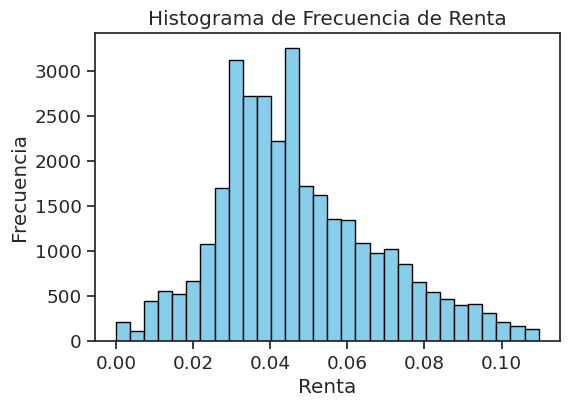

In [386]:
# Crear un gráfico de frecuencia con Matplotlib
plt.figure(figsize=(6, 4))
plt.hist(dfnum['Renta'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Frecuencia de Renta')
plt.xlabel('Renta')
plt.ylabel('Frecuencia')
plt.show()



Se elimino  los nulos para limpiar el dataset

In [310]:
dfnum= dfnum.dropna(how='any')# eliminar filas nulos
dfnum.shape

(32627, 18)

In [311]:
dfnum.isnull().sum().sum()

0

In [312]:
dfnum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32627 entries, 1 to 51123
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Renta          32627 non-null  float64
 1   Region         32627 non-null  object 
 2   CUPO_MX        32627 non-null  float64
 3   CUPO_L1        32627 non-null  int64  
 4   Edad           32627 non-null  int64  
 5   Sexo           32627 non-null  object 
 6   FacDebCom_T08  32627 non-null  float64
 7   EeccNac_T07    32627 non-null  float64
 8   UsoL1_T07      32627 non-null  float64
 9   FacDebAtm_T11  32627 non-null  float64
 10  ColL1TE_T07    32627 non-null  float64
 11  FacCN_T02      32627 non-null  float64
 12  Col_T02        32627 non-null  float64
 13  ColL2CC_T01    32627 non-null  int64  
 14  FacPAT_T11     32627 non-null  float64
 15  Ctacte         32627 non-null  int64  
 16  TC             32627 non-null  int64  
 17  Cuentas        32627 non-null  int64  
dtypes: flo

 ### 2 One hot encoding

Al revisar los valores de cada variable categorica, para transformar las clases a numericos para utilizarlos en mi proyecto.

Se reemplazan por valores numericos las clases categorias

In [313]:

# Aplicar One-Hot Encoding a la coluna 'Map'
df_encoded = pd.get_dummies(dfnum['Sexo'], prefix='Sexo')

# Concatenar el DataFrame original con las nuevas columnas codificadas
dfnum = pd.concat([dfnum, df_encoded], axis=1)

dfnum= dfnum.drop('Sexo', axis=1)





### Transformacion dtype .

In [314]:
dfnum['Region'] = pd.to_numeric(dfnum['Region'], errors='coerce')

# Cambia el tipo de datos de la columna a int
dfnum['Region'] = dfnum['Region'].astype('int')

In [315]:
dfnum['Sexo_M'] = dfnum['Sexo_M'].astype(int)
dfnum['Sexo_H'] = dfnum['Sexo_H'].astype(int)

In [316]:
dfnum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32627 entries, 1 to 51123
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Renta          32627 non-null  float64
 1   Region         32627 non-null  int64  
 2   CUPO_MX        32627 non-null  float64
 3   CUPO_L1        32627 non-null  int64  
 4   Edad           32627 non-null  int64  
 5   FacDebCom_T08  32627 non-null  float64
 6   EeccNac_T07    32627 non-null  float64
 7   UsoL1_T07      32627 non-null  float64
 8   FacDebAtm_T11  32627 non-null  float64
 9   ColL1TE_T07    32627 non-null  float64
 10  FacCN_T02      32627 non-null  float64
 11  Col_T02        32627 non-null  float64
 12  ColL2CC_T01    32627 non-null  int64  
 13  FacPAT_T11     32627 non-null  float64
 14  Ctacte         32627 non-null  int64  
 15  TC             32627 non-null  int64  
 16  Cuentas        32627 non-null  int64  
 17  Sexo_H         32627 non-null  int64  
 18  Sexo_M

In [317]:
dfprueba=dfnum

In [319]:
df10=dfnum

In [318]:
dfnum.describe()

,Renta,Region,CUPO_MX,CUPO_L1,Edad,FacDebCom_T08,EeccNac_T07,UsoL1_T07,FacDebAtm_T11,ColL1TE_T07,FacCN_T02,Col_T02,ColL2CC_T01,FacPAT_T11,Ctacte,TC,Cuentas,Sexo_H,Sexo_M
count,3.262700e+04,32627.000000,32627.000000,3.262700e+04,32627.000000,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,32627.000000,32627.000000,32627.000000,32627.000000,32627.000000,32627.000000
mean,6.721849e+05,10.951727,1533.967729,1.271075e+06,40.259233,7.137842e+04,1.900674e+05,1.816121e+05,2.462638e+05,1.150812e+05,6.903396e+04,3.437926e+05,4.791758e+04,4119.713581,0.927882,1.815797,1.468232,0.548503,0.451497
std,4.144496e+05,3.341992,1579.748229,1.052970e+06,12.175719,1.549564e+05,2.934006e+05,2.922309e+05,3.818717e+05,2.595706e+05,1.341247e+05,5.738129e+05,1.152688e+05,19326.482723,0.258687,0.895217,0.575609,0.497650,0.497650
min,1.000000e+00,1.000000,0.000000,0.000000e+00,19.000000,0.000000e+00,-6.317870e+06,-6.218200e+06,0.000000e+00,0.000000e+00,-3.377790e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,4.262705e+05,9.000000,500.000000,5.500000e+05,31.000000,0.000000e+00,2.683500e+04,1.333450e+04,0.000000e+00,0.000000e+00,0.000000e+00,5.708500e+04,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,5.802380e+05,13.000000,1000.000000,1.000000e+06,37.000000,0.000000e+00,8.734300e+04,7.675700e+04,1.120000e+05,0.000000e+00,2.197500e+04,1.706540e+05,0.000000e+00,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000
75%,8.295955e+05,13.000000,2000.000000,1.664000e+06,48.000000,8.181000e+04,2.370805e+05,2.327575e+05,3.530000e+05,1.054710e+05,8.768050e+04,4.049328e+05,4.612850e+04,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,1.308933e+07,13.000000,40000.000000,2.153400e+07,94.000000,3.581799e+06,5.065235e+06,5.065235e+06,1.400000e+07,4.870607e+06,5.900000e+06,1.193908e+07,2.908574e+06,693078.000000,1.000000,9.000000,5.000000,1.000000,1.000000


In [333]:
dfnum.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04,3.262700e+04
mean,1.672531e-16,1.271821e-16,-9.756433e-17,4.181329e-17,1.672531e-16,-3.135996e-17,-6.968881e-18,6.271993e-17,3.832884e-17,-2.787552e-17,-1.567998e-17,-6.271993e-17,3.135996e-17,1.393776e-17,-2.090664e-16,6.271993e-17,4.529773e-17,1.254399e-16,-7.491547e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.621896e+00,-2.977828e+00,-9.710353e-01,-1.207152e+00,-1.746062e+00,-4.606427e-01,-2.218140e+01,-2.190019e+01,-6.448961e-01,-4.433590e-01,-3.033140e+00,-5.991463e-01,-4.157091e-01,-2.131674e-01,-3.586939e+00,-9.112974e-01,-8.134675e-01,-1.102204e+00,-9.072733e-01
25%,-5.933608e-01,-5.840100e-01,-6.545243e-01,-6.848116e-01,-7.604787e-01,-4.606427e-01,-5.563552e-01,-5.758468e-01,-6.448961e-01,-4.433590e-01,-5.147075e-01,-4.996611e-01,-4.157091e-01,-2.131674e-01,2.787893e-01,-9.112974e-01,-8.134675e-01,-1.102204e+00,-9.072733e-01
50%,-2.218563e-01,6.128991e-01,-3.380133e-01,-2.574425e-01,-2.676871e-01,-4.606427e-01,-3.501220e-01,-3.588147e-01,-3.515994e-01,-4.433590e-01,-3.508650e-01,-3.017382e-01,-4.157091e-01,-2.131674e-01,2.787893e-01,2.057669e-01,-8.134675e-01,9.072733e-01,-9.072733e-01
75%,3.798123e-01,6.128991e-01,2.950087e-01,3.731643e-01,6.357641e-01,6.732051e-02,1.602375e-01,1.750197e-01,2.795123e-01,-3.702409e-02,1.390260e-01,1.065523e-01,-1.552115e-02,-2.131674e-01,2.787893e-01,2.057669e-01,9.238504e-01,9.072733e-01,1.102204e+00
max,2.996102e+01,6.128991e-01,2.434984e+01,1.924388e+01,4.413833e+00,2.265460e+01,1.661633e+01,1.671178e+01,3.601720e+01,1.832102e+01,4.347487e+01,2.020775e+01,2.481764e+01,3.564895e+01,2.787893e-01,8.025217e+00,6.135804e+00,9.072733e-01,1.102204e+00


### Normalizacion y Escalamiento

Se utiliza MinMaxScaler para normalizar las características flotantes y StandardScaler para estandarizar las características enteras.

Se deben preparar los datos en el aprendizaje automático antes de usar los datos para entrenar el modelo .<br>
Se debe Normalizar las variables que tienen valores grandes, ya que estas dominan  el entrenamiento.<br>
Segun la distribución de cada característica. La distribucion normal tiene forma de campana de distribución más o menos normal se normalizara mediante el método Zscore.<br>
Mientras que aquellos con valores grandes y bajos variables se normalizarán utilizando el método Min-Max.

In [338]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Separar las columnas en flotantes y enteras
float_columns = dfprueba.select_dtypes(include='float').columns
int_columns = dfprueba.select_dtypes(include='int').columns

# Aplicar Min-Max Scaling a las características flotantes
scaler_float = MinMaxScaler()
dfprueba[float_columns] = scaler_float.fit_transform(dfprueba[float_columns])

# Aplicar estandarización a las características enteras
scaler_int = StandardScaler()
dfprueba[int_columns] = scaler_int.fit_transform(dfprueba[int_columns])


In [339]:
dfprueba

,Renta,Region,CUPO_MX,CUPO_L1,Edad,FacDebCom_T08,EeccNac_T07,UsoL1_T07,FacDebAtm_T11,ColL1TE_T07,FacCN_T02,Col_T02,ColL2CC_T01,FacPAT_T11,Ctacte,TC,Cuentas,Sexo_H,Sexo_M
1,0.010974,0.612899,0.02500,-0.494870,0.471500,0.000000,0.615567,0.595333,0.000000,0.074541,0.056442,0.037348,-0.415709,0.000000,0.278789,-0.911297,-0.813468,0.907273,-0.907273
2,0.070982,0.612899,0.03750,0.074956,0.389368,0.012609,0.555202,0.556762,0.049214,0.000000,0.063437,0.004044,-0.415709,0.000000,0.278789,0.205767,-0.813468,0.907273,-0.907273
3,0.013175,0.612899,0.00000,0.284651,0.471500,0.000000,0.587293,0.583647,0.000000,0.066406,0.055431,0.025273,-0.415709,0.000000,-3.586939,0.205767,-0.813468,0.907273,-0.907273
4,0.061520,0.612899,0.16075,1.415945,0.471500,0.000000,0.588852,0.554128,0.000000,0.000000,0.107840,0.023855,-0.137850,0.000000,0.278789,1.322831,0.923850,0.907273,-0.907273
5,0.054064,0.612899,0.01785,0.039342,0.553632,0.000000,0.560357,0.551091,0.090857,0.000000,0.080141,0.003257,-0.415709,0.000000,0.278789,0.205767,-0.813468,0.907273,-0.907273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51118,0.031653,0.612899,0.04000,-0.238448,0.307236,0.009004,0.559567,0.551091,0.034000,0.000000,0.065284,0.009741,-0.069557,0.005050,0.278789,0.205767,0.923850,-1.102204,1.102204
51119,0.027884,0.612899,0.01375,-0.258392,0.882160,0.000000,0.613015,0.610890,0.048857,0.105129,0.061212,0.054904,-0.415709,0.000000,0.278789,1.322831,0.923850,0.907273,-0.907273
51120,0.047777,0.612899,0.00750,0.449331,0.882160,0.000000,0.558015,0.554111,0.000000,0.000000,0.054151,0.060046,4.778549,0.038843,0.278789,-0.911297,-0.813468,0.907273,-0.907273
51121,0.061594,0.612899,0.03815,-0.199510,0.553632,0.000000,0.556172,0.552251,0.001071,0.000000,0.058040,0.003202,-0.204469,0.000000,0.278789,0.205767,-0.813468,0.907273,-0.907273


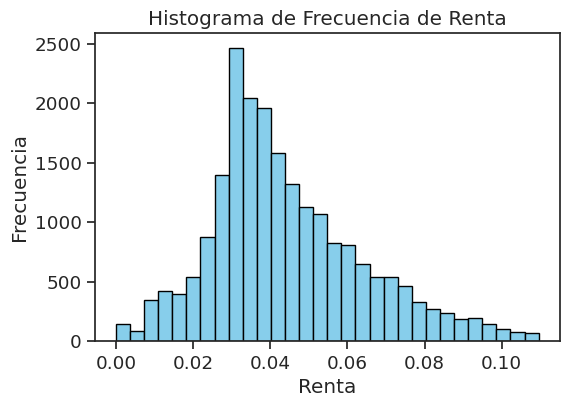

In [346]:
# Crear un gráfico de frecuencia con Matplotlib
plt.figure(figsize=(6, 4))
plt.hist(dfnum['Renta'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Frecuencia de Renta')
plt.xlabel('Renta')
plt.ylabel('Frecuencia')
plt.show()


In [356]:
dfnum=dfprueba
dfnum.shape

(32627, 19)

###Outliers


Se aplican transformaciones a los datos puede reducir el impacto de los outliers.Muchos valores extremos es un problema para metodos estadistico.

Grafico cajas antes de la transformacion
Se puede visualizar algunas variables en este grafico de cajas donde se observa que existen muchos outliers en la variables , estos se deben transforma

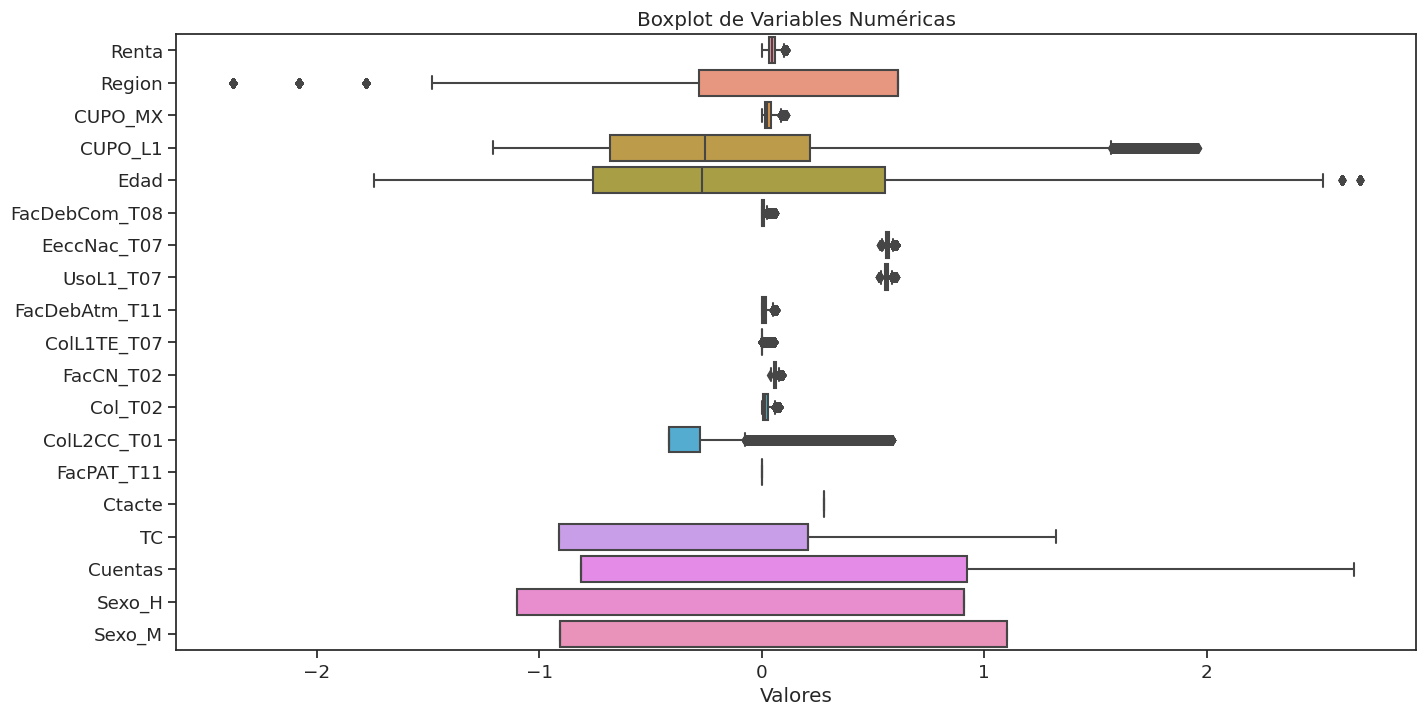

In [405]:
plt.figure(figsize=(16, 8))

# Crear un gráfico de caja para cada variable numérica en df_num
sns.boxplot(data=dfnum, orient="h")  # "orient='h'" para un gráfico horizontal

# Ajustar el diseño del gráfico
plt.title('Boxplot de Variables Numéricas')
plt.xlabel('Valores')
plt.show()


In [345]:


def remove_outliers_column(dfnum, column, threshold=1.5):
    """
    Elimina valores atípicos en una columna específica del DataFrame utilizando el método del rango intercuartílico (IQR).
    Devuelve un nuevo DataFrame sin outliers en esa columna.
    """
    # Calcular cuantiles y rango intercuartílico (IQR) para la columna
    Q1 = dfnum[column].quantile(0.25)
    Q3 = dfnum[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular límites para identificar outliers en la columna
    lower_limit = Q1 - threshold * IQR
    upper_limit = Q3 + threshold * IQR

    # Eliminar filas que contienen outliers en la columna especificada
    df_no_outliers = dfnum[(dfnum[column] >= lower_limit) & (dfnum[column] <= upper_limit)]

    return df_no_outliers

# Supongamos que 'dfnum' es tu DataFrame con variables numéricas
# Asegúrate de tener la función remove_outliers_column definida antes de ejecutar este código

# Eliminar outliers de la columna 'renta'
dfnum = remove_outliers_column(dfnum, column='Renta', threshold=1.5)
dfnum = remove_outliers_column(dfnum, column='CUPO_L1', threshold=1.5)
dfnum = remove_outliers_column(dfnum, column='FacDebAtm_T11', threshold=1.5)
dfnum = remove_outliers_column(dfnum, column='FacDebCom_T08', threshold=1.5)
dfnum = remove_outliers_column(dfnum, column='CUPO_L1', threshold=1.5)
dfnum = remove_outliers_column(dfnum, column='EeccNac_T07', threshold=1.5)
dfnum = remove_outliers_column(dfnum, column='Col_T02', threshold=1.5)

In [349]:
dfnum.columns

Index(['Renta', 'Region', 'CUPO_MX', 'CUPO_L1', 'Edad', 'FacDebCom_T08',
       'EeccNac_T07', 'UsoL1_T07', 'FacDebAtm_T11', 'ColL1TE_T07', 'FacCN_T02',
       'Col_T02', 'ColL2CC_T01', 'FacPAT_T11', 'Ctacte', 'TC', 'Cuentas',
       'Sexo_H', 'Sexo_M'],
      dtype='object')

###Imputar outliers por la mediana

In [358]:
def impute_outliers_median(dfnum, columns, threshold=1.5):
    """
    Imputa los valores outliers por la mediana utilizando el método del rango intercuartílico (IQR).
    Devuelve un nuevo DataFrame con los outliers imputados.
    """
    df_imputed = dfnum.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(dfnum[col]):
            # Calcular el rango intercuartílico
            Q1 = dfnum[col].quantile(0.25)
            Q3 = dfnum[col].quantile(0.75)
            IQR = Q3 - Q1

            # Definir los límites para considerar un valor como outlier
            lower_limit = Q1 - threshold * IQR
            upper_limit = Q3 + threshold * IQR

            # Imputar outliers por la mediana
            df_imputed[col] = df_imputed[col].apply(lambda x: dfnum[col].median() if x < lower_limit or x > upper_limit else x)

    return df_imputed

# Lista de variables para las cuales deseas imputar outliers por la mediana
variables_con_outliers = ['Renta', 'Region', 'CUPO_MX', 'CUPO_L1', 'Edad', 'FacDebCom_T08',
                           'EeccNac_T07', 'UsoL1_T07', 'FacDebAtm_T11', 'ColL1TE_T07', 'FacCN_T02',
                           'Col_T02', 'ColL2CC_T01', 'FacPAT_T11', 'Ctacte', 'TC', 'Cuentas']

# Imputar outliers por la mediana
df_imputado = impute_outliers_median(dfnum, columns=variables_con_outliers, threshold=1.5)


In [360]:
dfnum=df_imputado

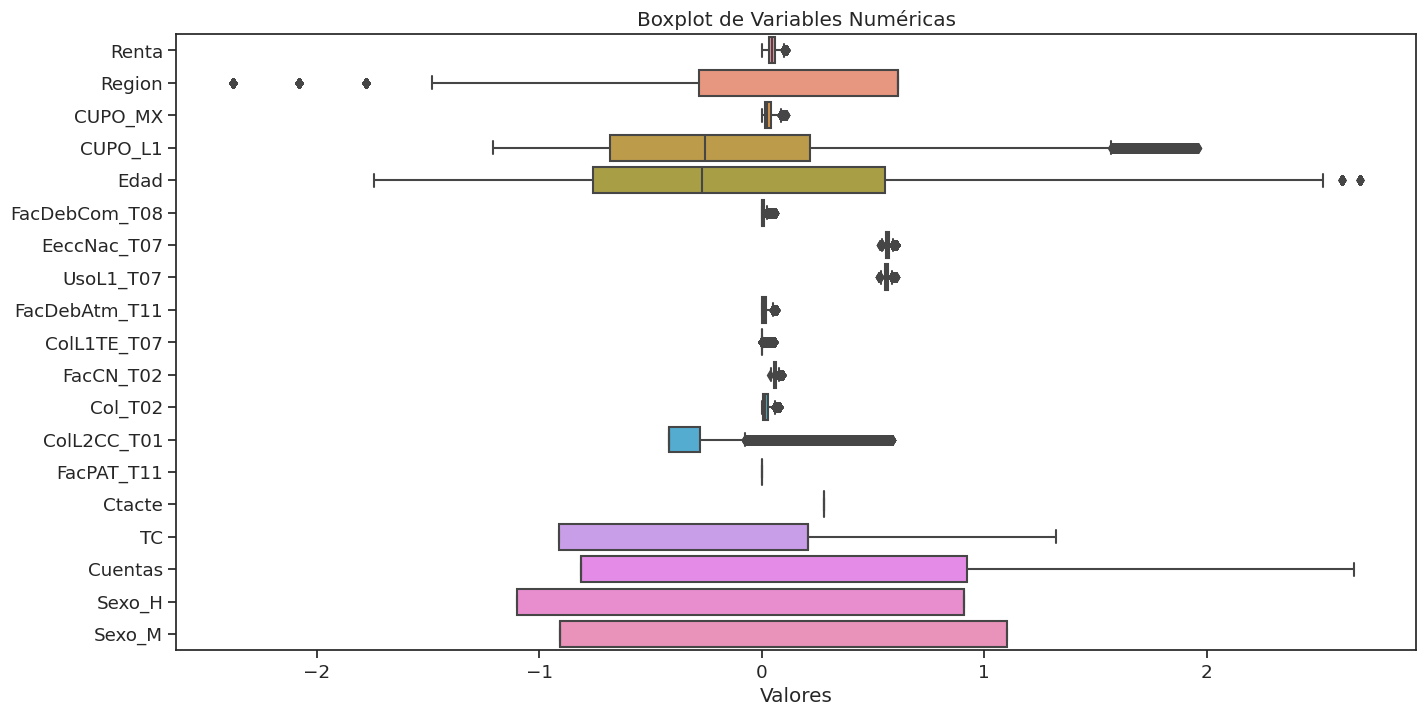

In [361]:
plt.figure(figsize=(16, 8))
# Crear un gráfico de caja para cada variable numérica en df_num
sns.boxplot(data=dfnum, orient="h")  # "orient='h'" para un gráfico horizontal

# Ajustar el diseño del gráfico
plt.title('Boxplot de Variables Numéricas')
plt.xlabel('Valores')
plt.show()

In [362]:
dfnum.shape

(32627, 19)

In [365]:
dfnum.head()

,Renta,Region,CUPO_MX,CUPO_L1,Edad,FacDebCom_T08,EeccNac_T07,UsoL1_T07,FacDebAtm_T11,ColL1TE_T07,FacCN_T02,Col_T02,ColL2CC_T01,FacPAT_T11,Ctacte,TC,Cuentas,Sexo_H,Sexo_M
1,0.010974,0.612899,0.02500,-0.494870,0.471500,0.000000,0.562695,0.595333,0.000000,0.0,0.056442,0.037348,-0.415709,0.0,0.278789,-0.911297,-0.813468,0.907273,-0.907273
2,0.070982,0.612899,0.03750,0.074956,0.389368,0.012609,0.555202,0.556762,0.049214,0.0,0.063437,0.004044,-0.415709,0.0,0.278789,0.205767,-0.813468,0.907273,-0.907273
3,0.013175,0.612899,0.00000,0.284651,0.471500,0.000000,0.587293,0.583647,0.000000,0.0,0.055431,0.025273,-0.415709,0.0,0.278789,0.205767,-0.813468,0.907273,-0.907273
4,0.061520,0.612899,0.02500,1.415945,0.471500,0.000000,0.588852,0.554128,0.000000,0.0,0.057673,0.023855,-0.137850,0.0,0.278789,1.322831,0.923850,0.907273,-0.907273
5,0.054064,0.612899,0.01785,0.039342,0.553632,0.000000,0.560357,0.551091,0.008000,0.0,0.080141,0.003257,-0.415709,0.0,0.278789,0.205767,-0.813468,0.907273,-0.907273


In [ ]:
df11= ['CUPO_L1','TxsCCOT_T11', 'TxsCN_T11', 'TxsAI_T05', 'ColL2CC_T08', 'UsoL1_T08', 'FlgActCN_T07', 'TxsCCOT_T06', 'ColL2AC_T08', 'TxsDebAtm_T03', 'FacCN_T02', 'TxsPAT_T02', 'TxsPAT_T05', 'FacPAT_T03', 'FlgActPAT_T06', 'UsoL2_T09', 'FacCN_T04', 'UsoL2_T04', 'FacCOL_T04']

In [367]:
# Separamos en Train y Test
X = dfnum.drop(["Renta"], axis=1)
X.head()

,Region,CUPO_MX,CUPO_L1,Edad,FacDebCom_T08,EeccNac_T07,UsoL1_T07,FacDebAtm_T11,ColL1TE_T07,FacCN_T02,Col_T02,ColL2CC_T01,FacPAT_T11,Ctacte,TC,Cuentas,Sexo_H,Sexo_M
1,0.612899,0.02500,-0.494870,0.471500,0.000000,0.562695,0.595333,0.000000,0.0,0.056442,0.037348,-0.415709,0.0,0.278789,-0.911297,-0.813468,0.907273,-0.907273
2,0.612899,0.03750,0.074956,0.389368,0.012609,0.555202,0.556762,0.049214,0.0,0.063437,0.004044,-0.415709,0.0,0.278789,0.205767,-0.813468,0.907273,-0.907273
3,0.612899,0.00000,0.284651,0.471500,0.000000,0.587293,0.583647,0.000000,0.0,0.055431,0.025273,-0.415709,0.0,0.278789,0.205767,-0.813468,0.907273,-0.907273
4,0.612899,0.02500,1.415945,0.471500,0.000000,0.588852,0.554128,0.000000,0.0,0.057673,0.023855,-0.137850,0.0,0.278789,1.322831,0.923850,0.907273,-0.907273
5,0.612899,0.01785,0.039342,0.553632,0.000000,0.560357,0.551091,0.008000,0.0,0.080141,0.003257,-0.415709,0.0,0.278789,0.205767,-0.813468,0.907273,-0.907273


In [380]:
dfnuevo=[['Region','Renta','Sexo','Subsegmento','Edad','Adicional','Antiguedad','CambioPin','Consumo',
                           'Debito','Ctacte','Cuentas','Hipotecario','Internauta','Monoproducto','TC','Dualidad',
                           'CUPO_L1','CUPO_MX','CUPO_L2','Col_T12','ColL1TE_T12','EeccInt_T12','EeccNac_T12',
                           'Fac_T12','FacAI_T12','FacAN_T12','FacCCOT_T12','FacCCPC_T12','FacCI_T12','FacCN_T12',
                           'FacCOL_T12','FacDebAtm_T12','FacDebCom_T12','FacPAT_T12','FlgAct_T12','FlgActAI_T12',
                           'FlgActAN_T12','FlgActCCOT_T12','FlgActCCPC_T12','FlgActCI_T12','FlgActCN_T12',
                           'FlgActCOL_T12','FlgActPAT_T12','PagoInt_T12','PagoNac_T12','Txs_T12','TxsAI_T12',
                           'TxsAN_T12','TxsCCOT_T12','TxsCCPC_T12','TxsCI_T12','TxsCN_T12','TxsCOL_T12',
                           'TxsDebAtm_T12','TxsDebCom_T12','TxsPAT_T12','UsoL1_T12','UsoL2_T12','UsoLI_T12','target']]


In [382]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado 'df' y deseas seleccionar columnas específicas
# df = ...

# Lista de columnas que deseas incluir en el nuevo DataFrame
columnas_seleccionadas = ['Region', 'Renta', 'Sexo', 'Subsegmento', 'Edad', 'Adicional', 'Antiguedad',
                           'CambioPin', 'Consumo', 'Debito', 'Ctacte', 'Cuentas', 'Hipotecario', 'Internauta',
                           'Monoproducto', 'TC', 'Dualidad', 'CUPO_L1', 'CUPO_MX', 'CUPO_L2', 'Col_T12',
                           'ColL1TE_T12', 'EeccInt_T12', 'EeccNac_T12', 'Fac_T12', 'FacAI_T12', 'FacAN_T12',
                           'FacCCOT_T12', 'FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 'FacCOL_T12', 'FacDebAtm_T12',
                           'FacDebCom_T12', 'FacPAT_T12', 'FlgAct_T12', 'FlgActAI_T12', 'FlgActAN_T12', 'FlgActCCOT_T12',
                           'FlgActCCPC_T12', 'FlgActCI_T12', 'FlgActCN_T12', 'FlgActCOL_T12', 'FlgActPAT_T12',
                           'PagoInt_T12', 'PagoNac_T12', 'Txs_T12', 'TxsAI_T12', 'TxsAN_T12', 'TxsCCOT_T12',
                           'TxsCCPC_T12', 'TxsCI_T12', 'TxsCN_T12', 'TxsCOL_T12', 'TxsDebAtm_T12', 'TxsDebCom_T12',
                           'TxsPAT_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'target']

# Crear el nuevo DataFrame con las columnas seleccionadas
dfnuevo = df[columnas_seleccionadas].copy()

# Si deseas asegurarte de que 'target' esté en el conjunto de datos, puedes usar la siguiente línea:
# dfnuevo = df[columnas_seleccionadas + ['target']].copy()


In [383]:
dfnuevo.shape

(51124, 61)

In [384]:
y = dfnuevo["Renta"]
y.head()

0         NaN
1    143640.0
2    929106.0
3    172447.0
4    805250.0
Name: Renta, dtype: float64

In [385]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: ignored

# Fase 4 Modelamiento

* Seleccionar las técnicas de modelado apropiadas (regresión, clasificación, clustering, etc.).
* Seleccionar algoritmos específicos para cada técnica de modelado.
* Ajustar los parámetros del modelo para optimizar el rendimiento.
* Construir modelos utilizando el conjunto de datos de entrenamiento.
* Evaluar la calidad y la eficacia de los modelos

la variables target objetivo ,    y  las  variable predictoras son las que estan relacionadas e influyen en el target..
entrenamiento: son un 80 % a 70% . se parten en 2 valores predictores y prediccion
test o validacion: 20% 30% se guardan ...y lo mismo un trozo de cada variable predicto y objetivo

toman los datos de entrenamiento ()y se hace el proceso de entrenamiento de  modelo de machine para que aprenda como funcionan las estas variables predictoras puedo generar mi prediccion.

test o prueba : sirven para ver si el modelo se ha entrenado bien o mal. Se toman las  variables predictoras(x)del test y se pasan al modelo entrenado, el modelo entrenado me hara predcciones .

luego se compara la variable target( ytest) q no ha vsito el modelo en proceso de entrenamiento y ver que tan lejos esta la prediccion.. y_test mas creca y_train aceptable .







* codigo: fase de entreamiento


In [370]:
# Se usara una Regresión Lineal, uno de los modelos más comunes.

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)# entrena el modelo con los datos de train

LinearRegression()

In [371]:
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 9.43%
R squared of the Linear Regression on test set: 9.37%


R squared of the Linear Regression on training set: 9.43%
R squared of the Linear Regression on test set: 9.37%


###Modelo de regresion

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


 Dividir los datos en conjuntos de entrenamiento y prueba.

In [ ]:
X = df_num.drop('CUPO_L1', axis=1)  # Características (todas las columnas excepto 'target')
y = df_num['CUPO_L1']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("R squared of the Linear Regression on training set: {:.2%}".format(model.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(model.score(X_test, y_test)))

In [ ]:
y_pred = model.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred, color="blue")


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R-squared): {r2:.2f}")


RANDOMFOREST DE REGRESION

 # 5 FASE EVALUACION DE MODELOS


In [ ]:
# Evaluando el Modelo de Regresión Lineal
#
d = {"true": y_test, "predicted": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr


In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}".format(mean_absolute_error(y_test, y_pred1)))

In [ ]:
# Nuestro modelo de regresión lineal pudo predecir el precio de cada diamante
# en el conjunto de prueba con un error de ± $869.38 del precio real.

In [ ]:
# Las siguientes líneas muestran un error, pues dan un valor negativo!!!!
#
from sklearn.metrics import mean_squared_log_error
print("Mean Squared Log Error of the Linear Regression on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred)))

***Este modelo en términos de producto es un mal producto porque no tiene sentido un precio negativo.***

In [ ]:
# # Evaluando el Modelo de Bosque Aleatorio de árboles de decisión
#
d = {"true": y_test, "predicted": y_pred2}
df_rf = pd.DataFrame(data=d)
df_rf["diff"] = df_rf["predicted"]-df_rf["true"]
df_rf


In [ ]:
print("Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}".format(mean_absolute_error(y_test,y_pred2)))

###Nuestro modelo de bosque aleatorio pudo predecir el precio de cada diamante
### en el conjunto de prueba con un error de ± $ 277 del precio real.

In [ ]:
print("Mean Squared Log Error of the Random Forest Regressor on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred2)))

###Nuestro modelo  de bosque aleatorio fue capaz de predecir el precio de cada diamante
### en el conjunto de prueba con un error de ± 1,25 % del precio real.

#**
###Selección del Modelo : se puede eligir el modelo Bosque Aleatorio como el mejor modelo entre los tres,
### en función de sus puntajes MAE y MSLE en la prueba
###
model = rf
model

#FASE DE DESPLIEGUE

* Evaluar el rendimiento de los modelos utilizando el conjunto de datos de prueba.
* Comparar los resultados con los criterios de éxito establecidos.
* Iterar y ajustar modelos según sea necesario.
* Documentar las limitaciones y las lecciones aprendidas.
* Preparar recomendaciones basadas en los resultados.
* Preparar la implementación del modelo en un entorno operacional.


Entonces, nuestro modelo Random Forest es un modelo bastante bueno para predecir el precio de mercado de un diamante. Ahora, ¿cómo predecimos el precio de mercado de un nuevo diamante nuevo diamante? Supongamos que hay un diamante nuevo que tiene: quilate=0,23, corte=5 (Ideal), color=2 (E), claridad=1 (SI2), profundidad=61,5, tabla=55, volumen=38,20 (x=3,95, y=3,98 y z=2,43). bold text



In [ ]:
Entonces, nuestro modelo Random Forest es un modelo bastante bueno para predecir el precio de mercado de un diamante. Ahora, ¿cómo predecimos el precio de mercado de un nuevo diamante nuevo diamante? Supongamos que hay un diamante nuevo que tiene: quilate=0,23, corte=5 (Ideal), color=2 (E), claridad=1 (SI2), profundidad=61,5, tabla=55, volumen=38,20 (x=3,95, y=3,98 y z=2,43). bold text

In [ ]:
new_diamond = [0.23, 5, 2, 1, 61.5, 55, 38.20]
new_diamond


In [ ]:
# Podemos tomar estos nuevos datos y usarlos para predecir el precio de mercado del nuevo diamante.
#
prediction = model.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

**Guardar el modelo finalizado en formato pickle nos ahorra mucho tiempo ya que no tenemos que entrenar nuestro modelo cada vez que ejecutamos la aplicación. Una vez que guardamos nuestro modelo como pickle, puede cargarlo más tarde mientras realiza la predicción.**


In [ ]:
import pickle

In [ ]:
# Primero, abramos un nuevo archivo para nuestro almacenar nuestro modelo y poder llamarlo
f1 = open('fw_model1', 'wb')

In [ ]:
# Así, salvamos en este archivo nuestro modelo de Bosque Aleatorio
pickle.dump(model , f1)

In [ ]:
# Y cerramos el archivo
f1.close()

En un nuevo notebook

In [ ]:
#import pickle
#f2 = open('fw_model1', 'rb')
#model = pickle.load(f2)
# ** Haga una nueva predicción para la transacción anterior
#model.predict([[0.23, 5, 2, 1, 61.5, 55, 38.20]])[0]
# ** Debería obtener $382.34


# MODELO DE CLASIFICACION





In [ ]:
# Visualizar la distribución de las clases objetivo
plt.figure(figsize=(3, 6))  # Ajustar el tamaño del gráfico
sns.countplot(x='MatchWinner', data=df)
plt.title('Distribución de clases objetivo')
plt.show()
